# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('nyc_taxi.zip') # считываем данные

In [5]:
df.head() # смотрим на первые 5 наблюдений

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
df.drop(columns=['dropoff_datetime'], inplace=True) # удаляем колонку dropoff_datetime

df.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id2875421          2  2016-03-14 17:24:55                1   
1  id2377394          1  2016-06-12 00:43:35                1   
2  id3858529          2  2016-01-19 11:35:24                1   
3  id3504673          2  2016-04-06 19:32:31                1   
4  id2181028          2  2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

In [7]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime']) # переводим данные в datetime-объекты

df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

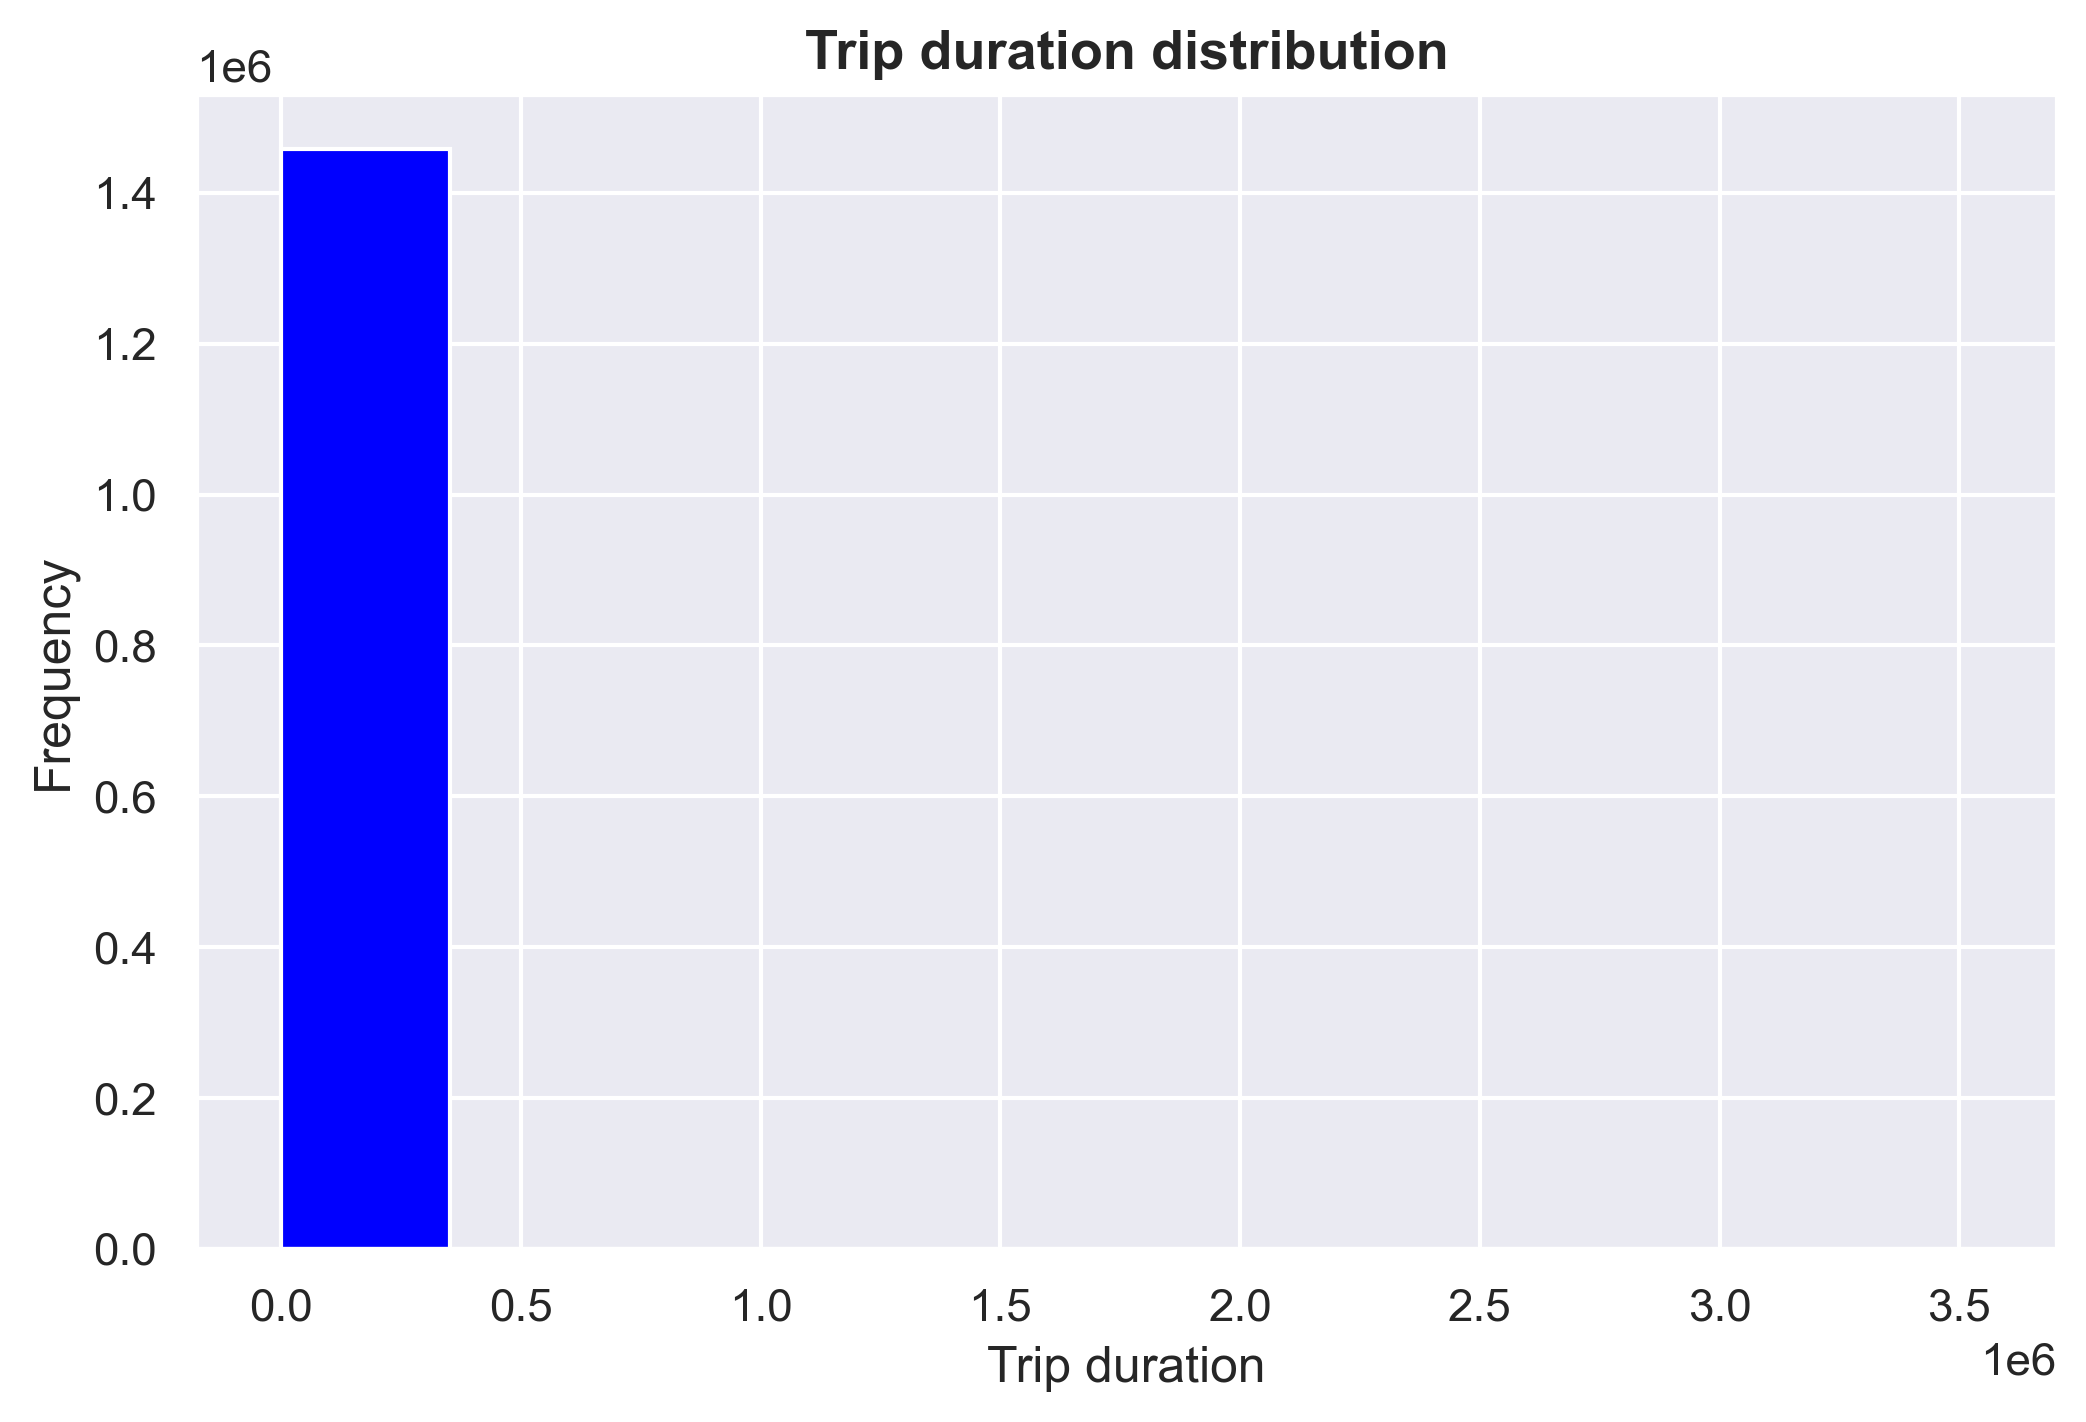

In [8]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300) # задаем фигуру и область для графика

ax.hist(df['trip_duration'].values, color='blue') # задаём график

ax.set_xlabel('Trip duration') # подпись оси x
ax.set_ylabel('Frequency') # подпись оси y
ax.set_title('Trip duration distribution', size=13, weight='extra bold') # название графика

plt.show() # показать график

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**В данных есть дичайшие выбросы, которые портят всю малину, распределение с лютой правосторонней ассиметрией**

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Потому что в данной задаче важно предсказывать не точное значение времени, а достаточно угадывать порядок, в самом деле - если чуваку сказали ехать условно час, то для него пару минут/секунд вообще не критичны; но вот если он едет пару минут, тот тут возможно каждая секунда на счету**

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:  
$MSE(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big((\hat{y}_i - \hat{a}(x_i)\big)^2 = \frac{1}{\ell}\sum_{i=1}^{\ell} \big((\log{(y_i + 1)} - \hat{a}(x_i)\big)^2$   
$RMSLE(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}=\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2}=\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \hat{a}(x_i)\big)^2}$  
Поскольку корень это выпуклая функция, то взятие корня от функции - не меняет её оптимума, а поскольку выражение под корнем $RMSLE(X, y, a)$ совпадает с $MSE(X, \hat{y}, \hat{a})$, то оптимум этих функций - одинаков, а значит задачи эквивалентны.



Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [9]:
df['log_trip_duration'] = np.log1p(df['trip_duration']) # логарифмируем таргет

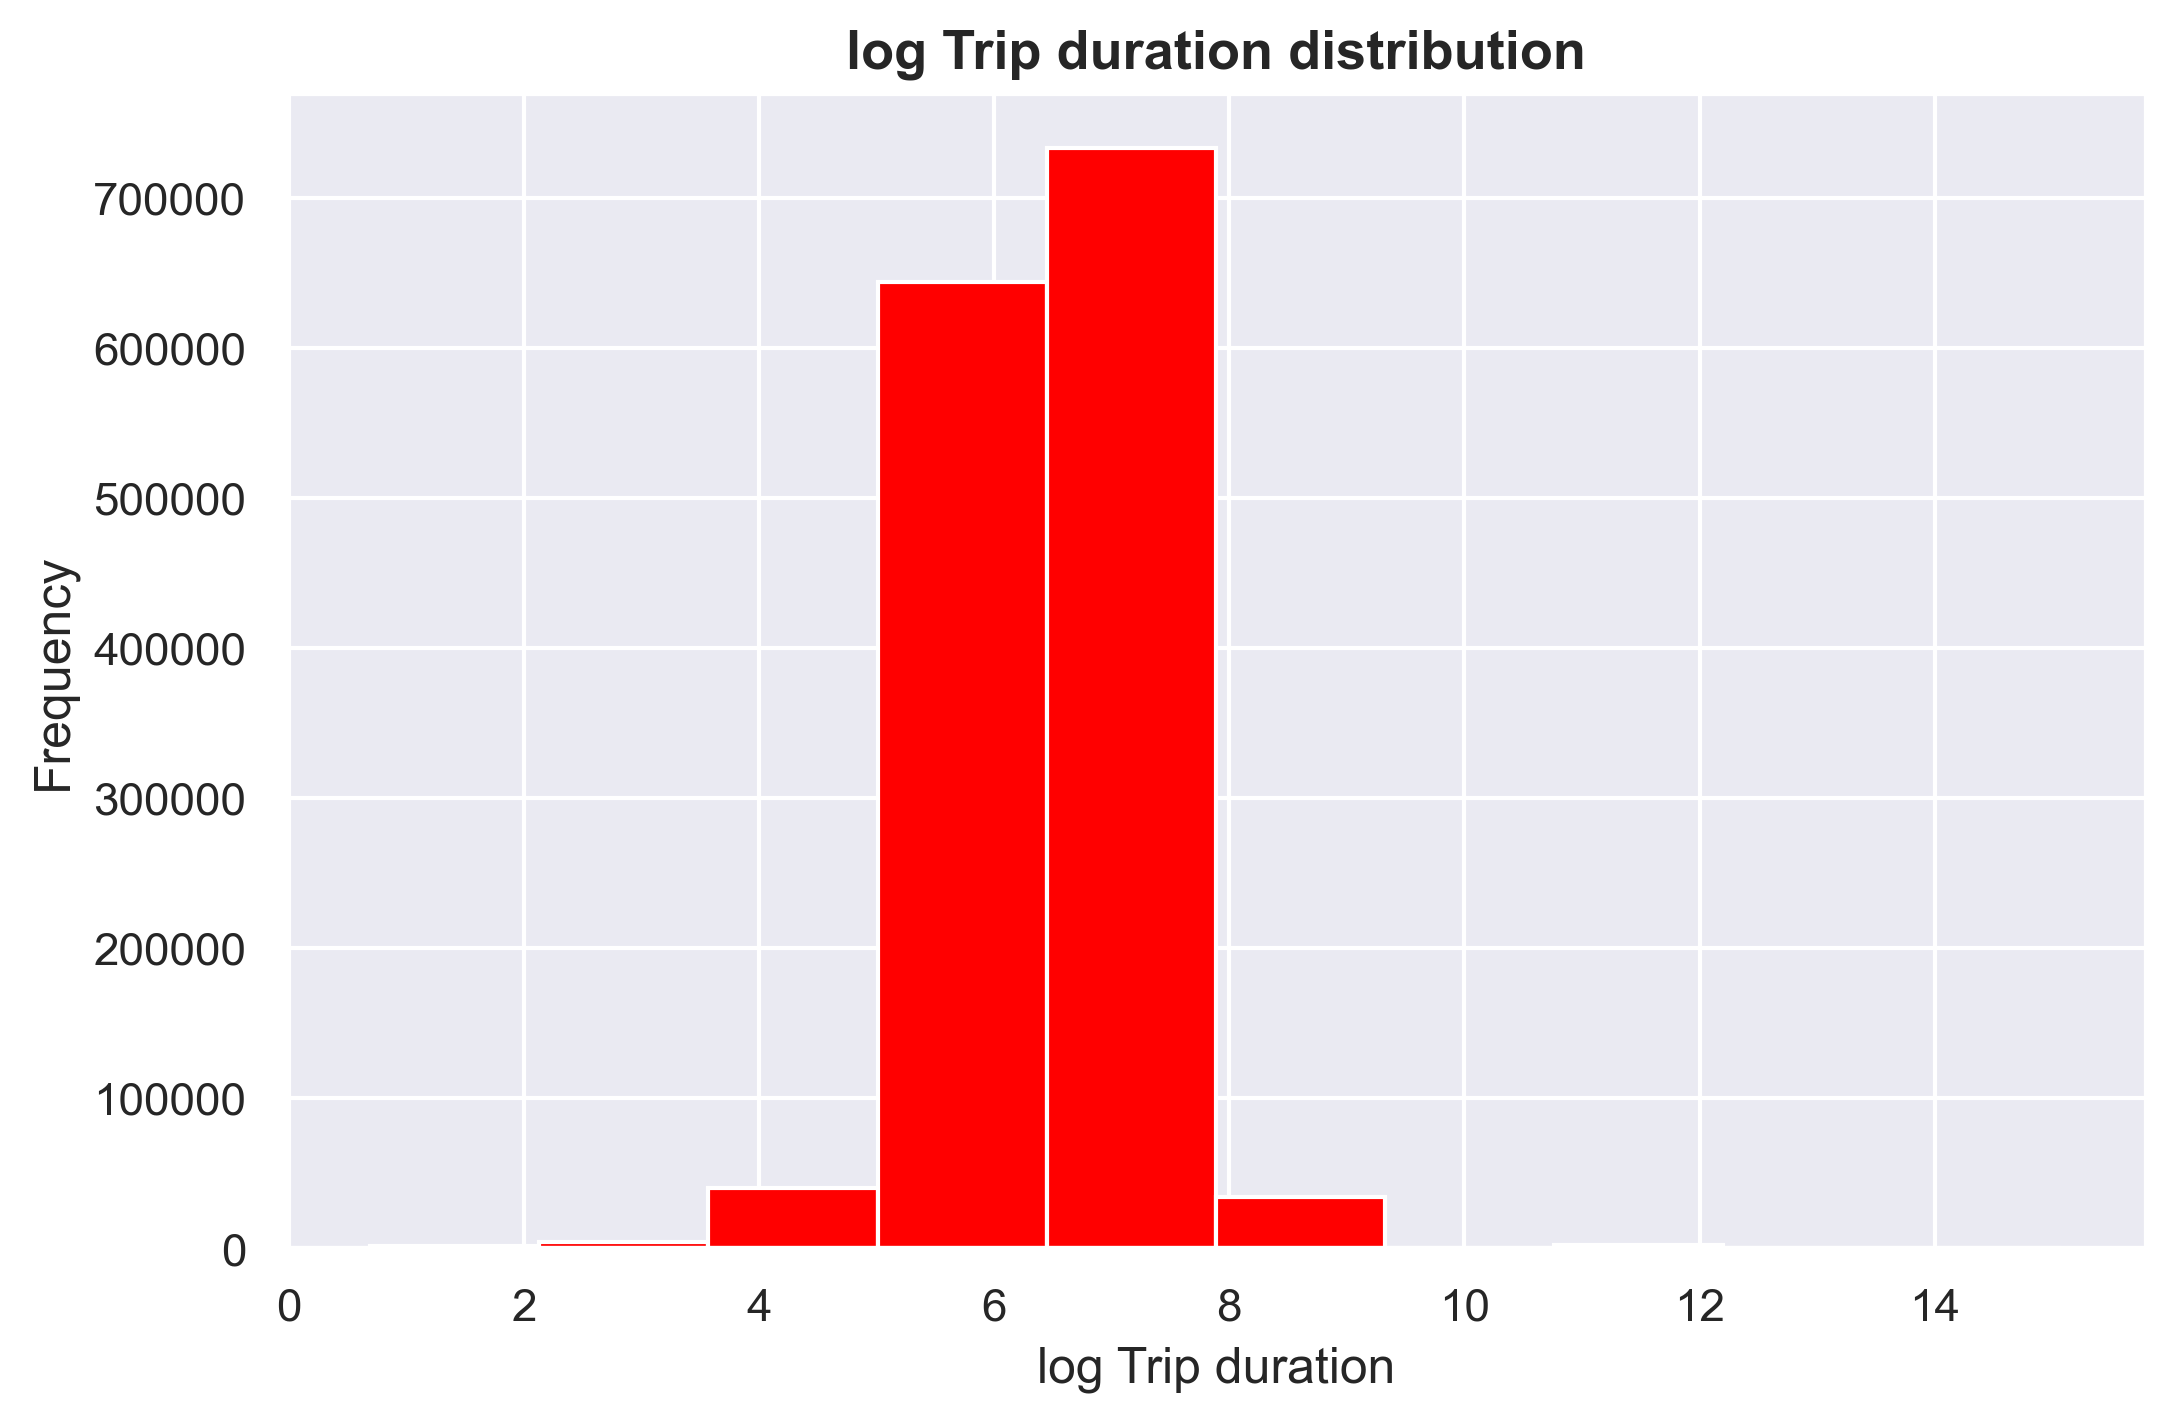

In [10]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(df['log_trip_duration'].values, color='red')

ax.set_xlabel('log Trip duration')
ax.set_ylabel('Frequency')
ax.set_title('log Trip duration distribution', size=13, weight='extra bold')

plt.show()

In [11]:
df.drop(columns=['trip_duration'], inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
def rmsle(log1p_y_true, log1p_y_pred): 
    return np.sqrt(np.mean(np.square(log1p_y_true - log1p_y_pred)))

# поскольку задачи эквивалентны а для MSE лучшая константа - среднее
best_const = df['log_trip_duration'].mean()

rmsle_best_const = rmsle(df['log_trip_duration'].values, best_const)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [13]:
trips_per_day = df.groupby(df['pickup_datetime'].dt.date)['id'].count()

cnt_trips = trips_per_day.values
days = trips_per_day.index

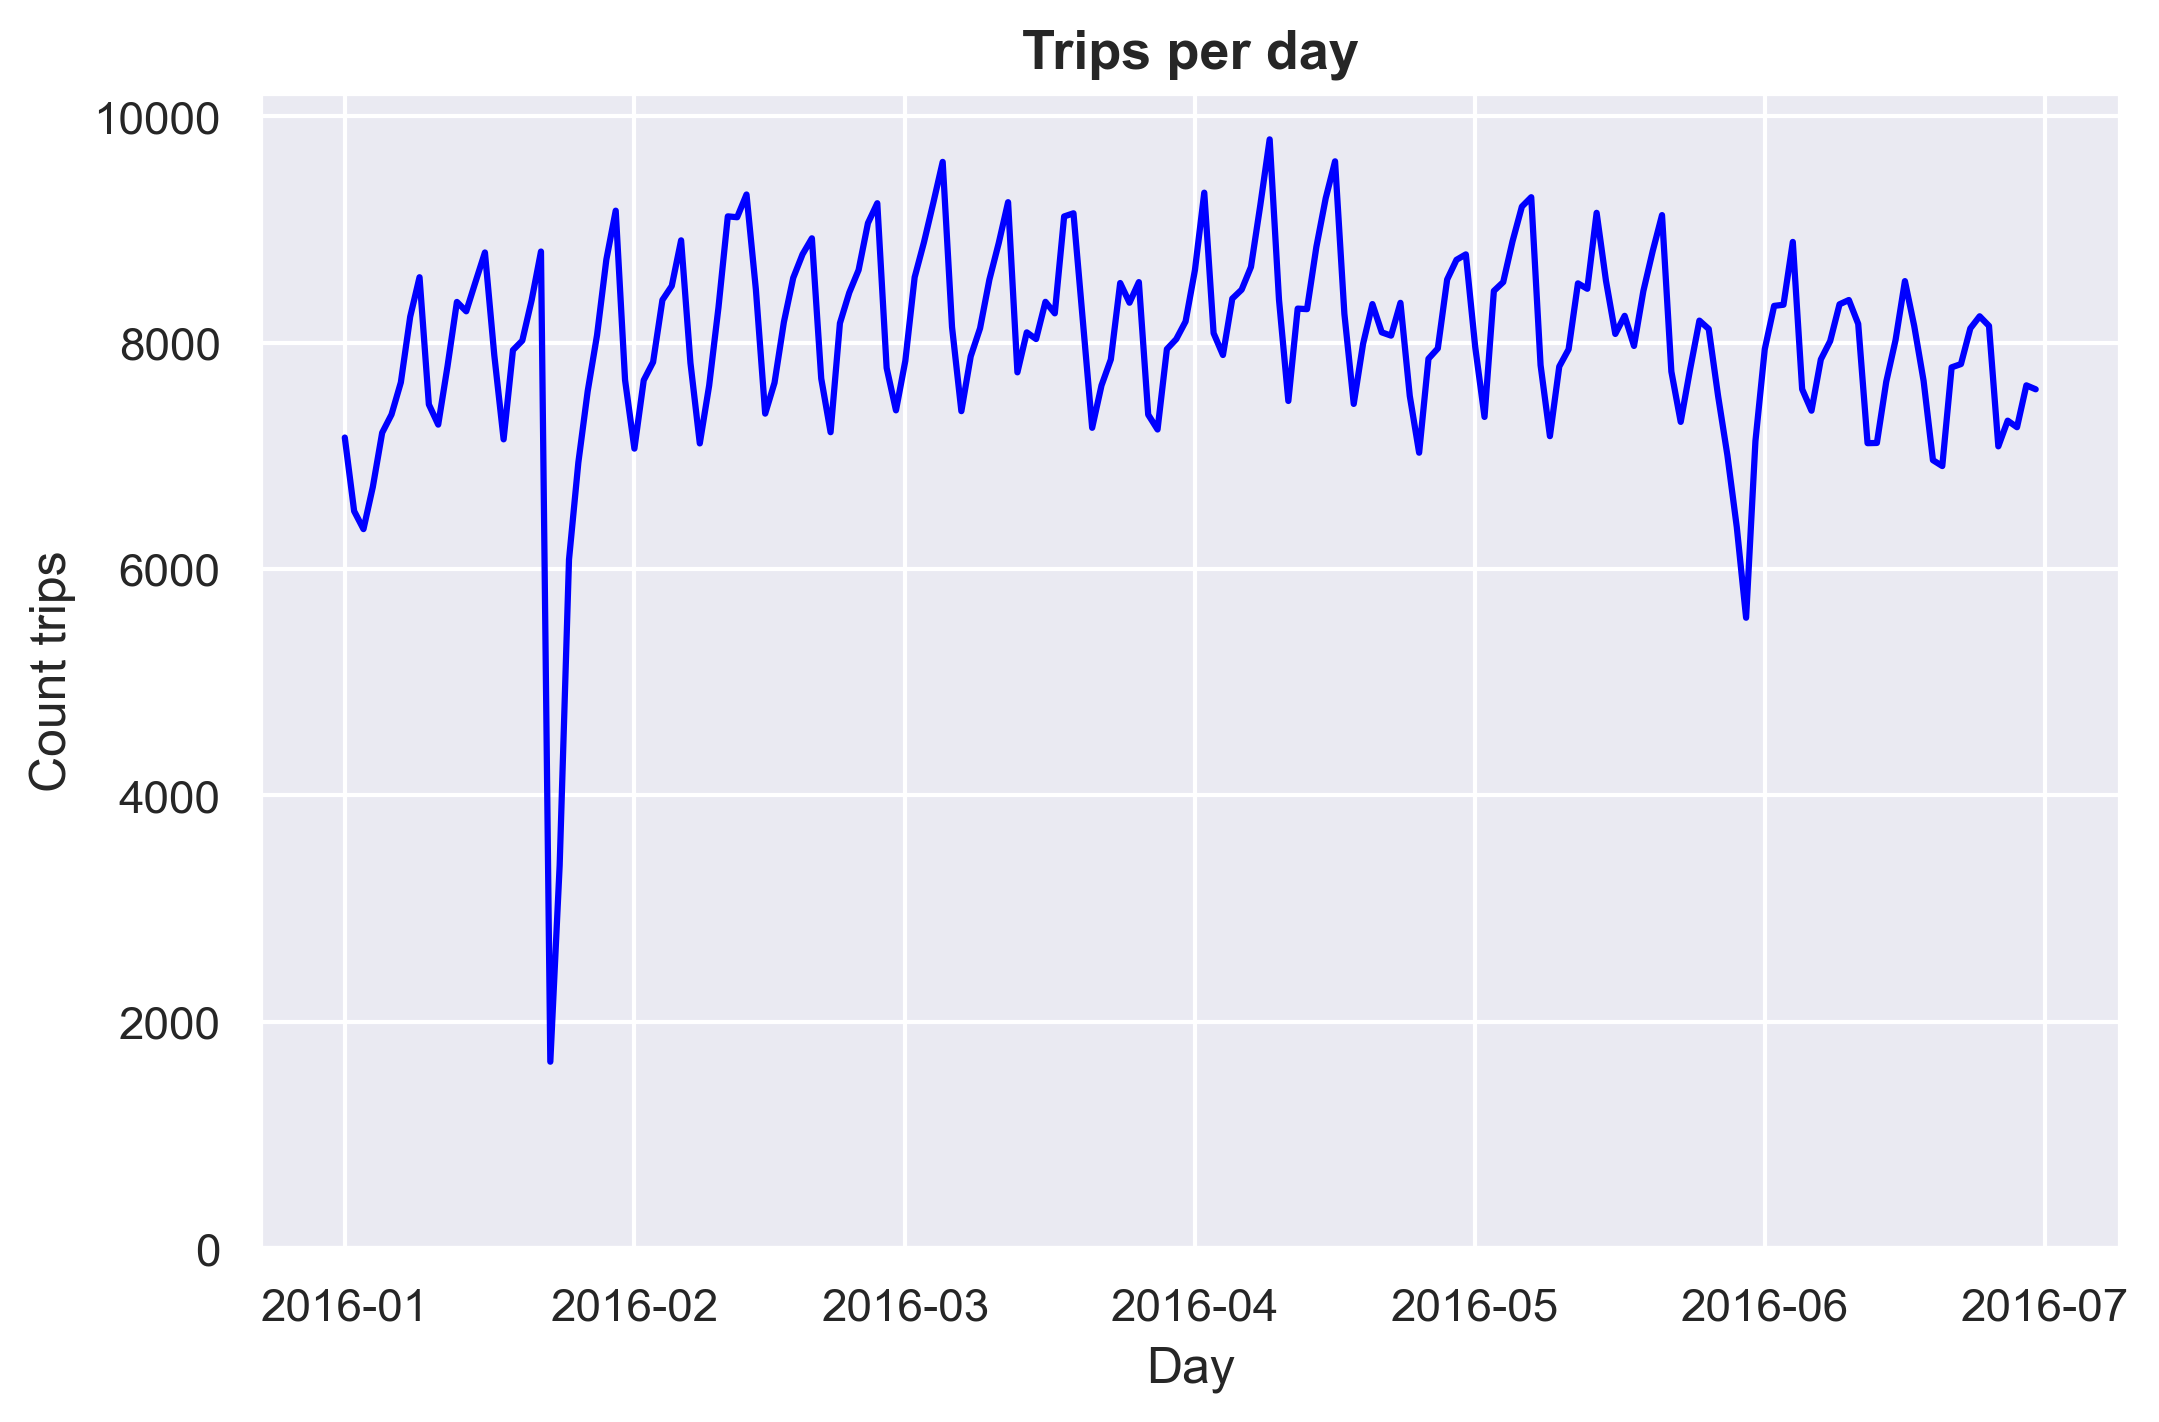

In [14]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.plot(days.values, cnt_trips, color='blue')

ax.set_xlabel('Day')
ax.set_ylabel('Count trips')
ax.set_title('Trips per day', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

In [15]:
trips_per_day[trips_per_day < 6300] # плохие даты

pickup_datetime
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-05-30    5570
Name: id, dtype: int64

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**В конце января в Нью-Йорке были сильные снегопады и поэтому власти запретили автомобильное движение, а 30 мая в Нью-Йорке были бандитские разборки со стрельбой**

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [16]:
trips_per_hour = df.groupby(df['pickup_datetime'].dt.hour)['id'].count()

trips_per_wday = df.groupby(df['pickup_datetime'].dt.weekday)['id'].count()

In [17]:
cnt_trips_hour = trips_per_hour.values # суммарное количество поездок по дням

cnt_trips_wday = trips_per_wday.values # суммарное количество поездок по дню недели

In [18]:
hours = trips_per_hour.index # часы

wdays = trips_per_wday.index # дни недели

**0 - Monday, 6 - Sunday**

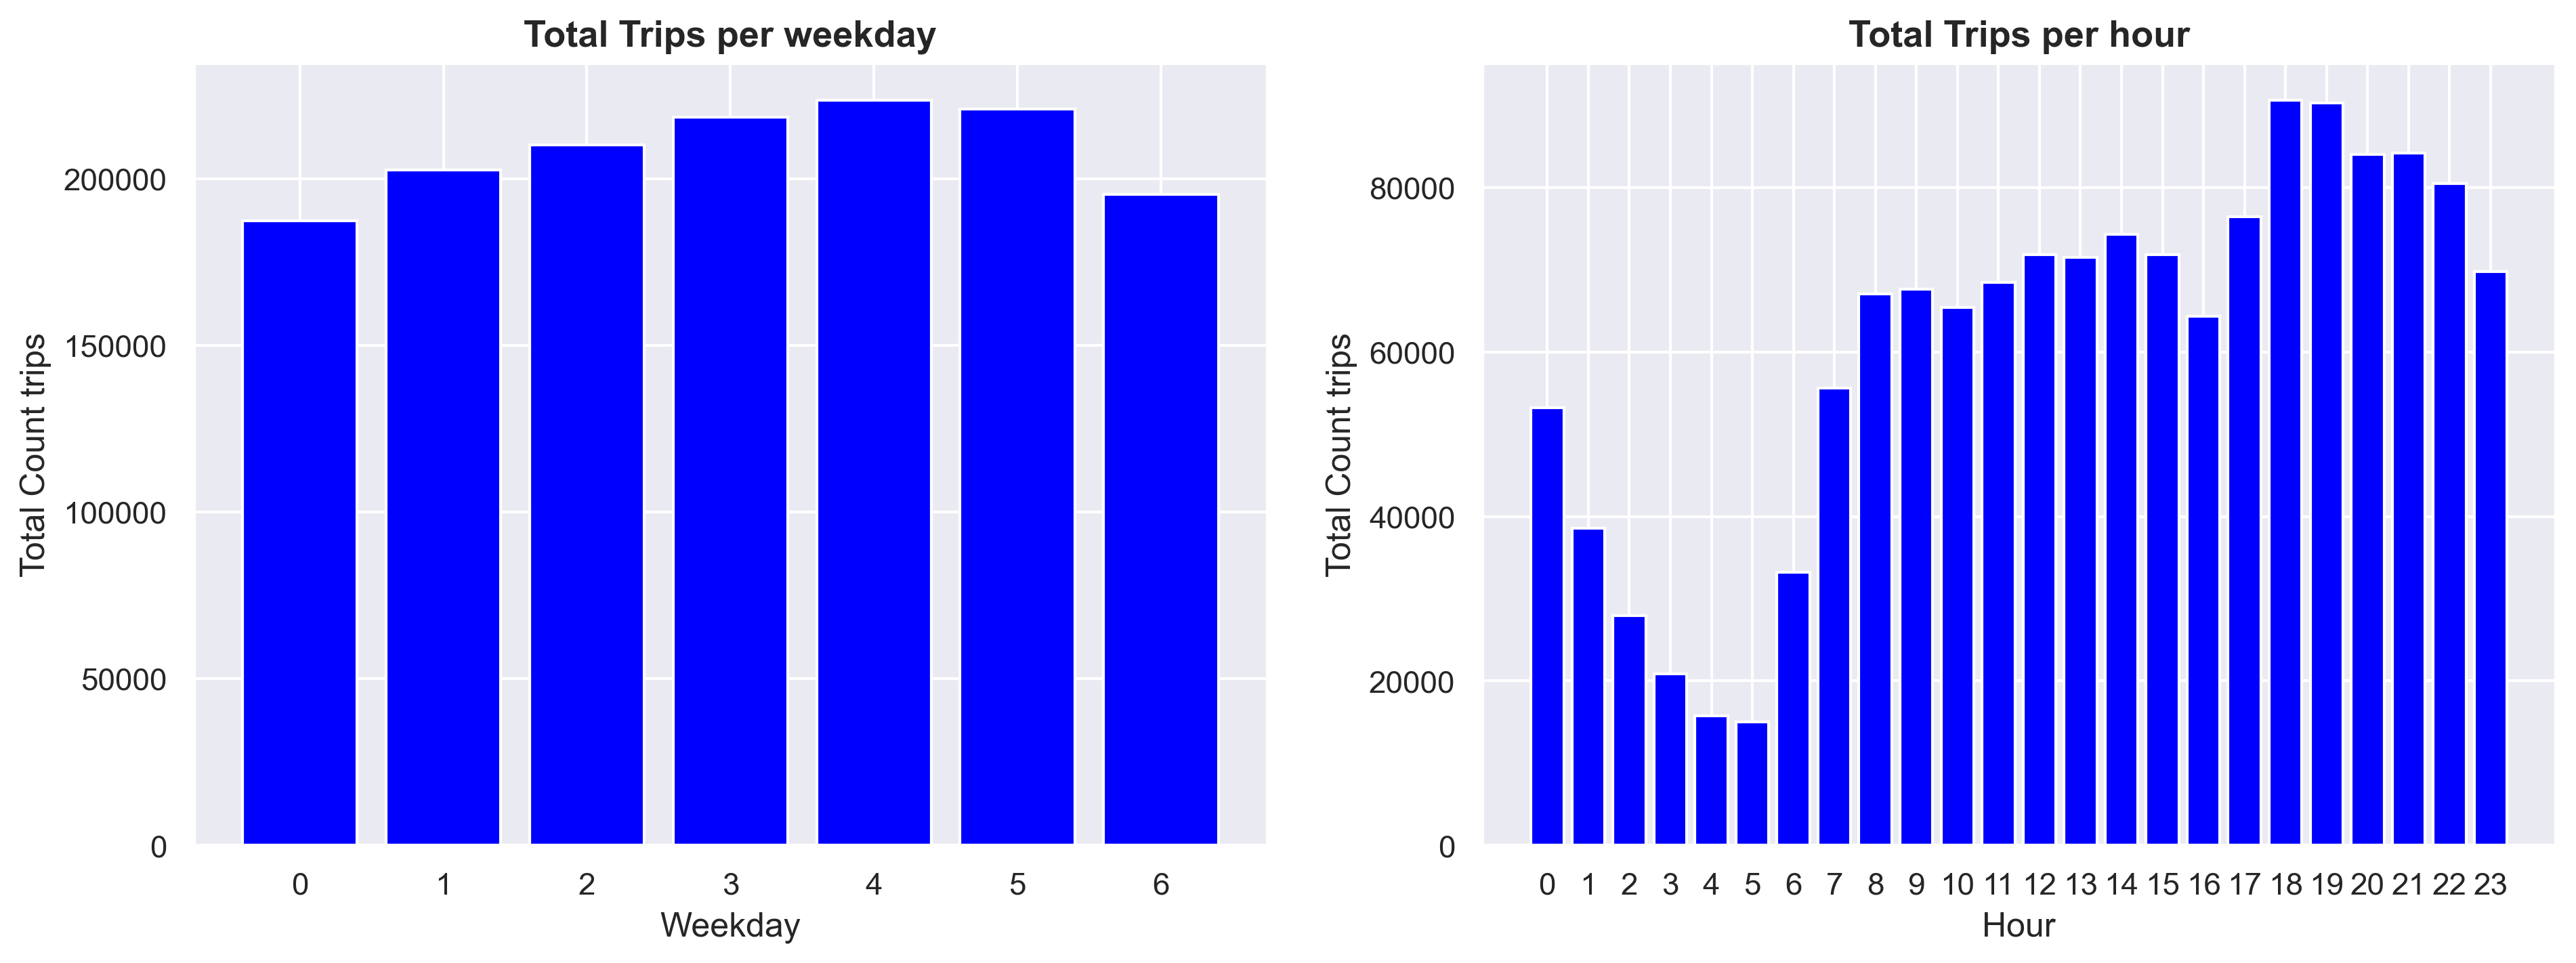

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

ax[0].bar(wdays.values, cnt_trips_wday, color='blue')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Total Count trips')
ax[0].set_title('Total Trips per weekday', size=13, weight='extra bold')
ax[0].set_xticks(wdays.values)

ax[1].bar(hours.values, cnt_trips_hour, color='blue')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total Count trips')
ax[1].set_title('Total Trips per hour', size=13, weight='extra bold')
ax[1].set_xticks(hours.values)

plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [20]:
tmp = pd.DataFrame()

tmp['hour'] = df['pickup_datetime'].dt.hour
tmp['month'] = df['pickup_datetime'].dt.month
tmp['wday'] = df['pickup_datetime'].dt.weekday
tmp['id'] = df['id']

In [21]:
hour_month = tmp.groupby(['hour', 'month'])['id'].count().reset_index()

hour_wday = tmp.groupby(['hour', 'wday'])['id'].count().reset_index()

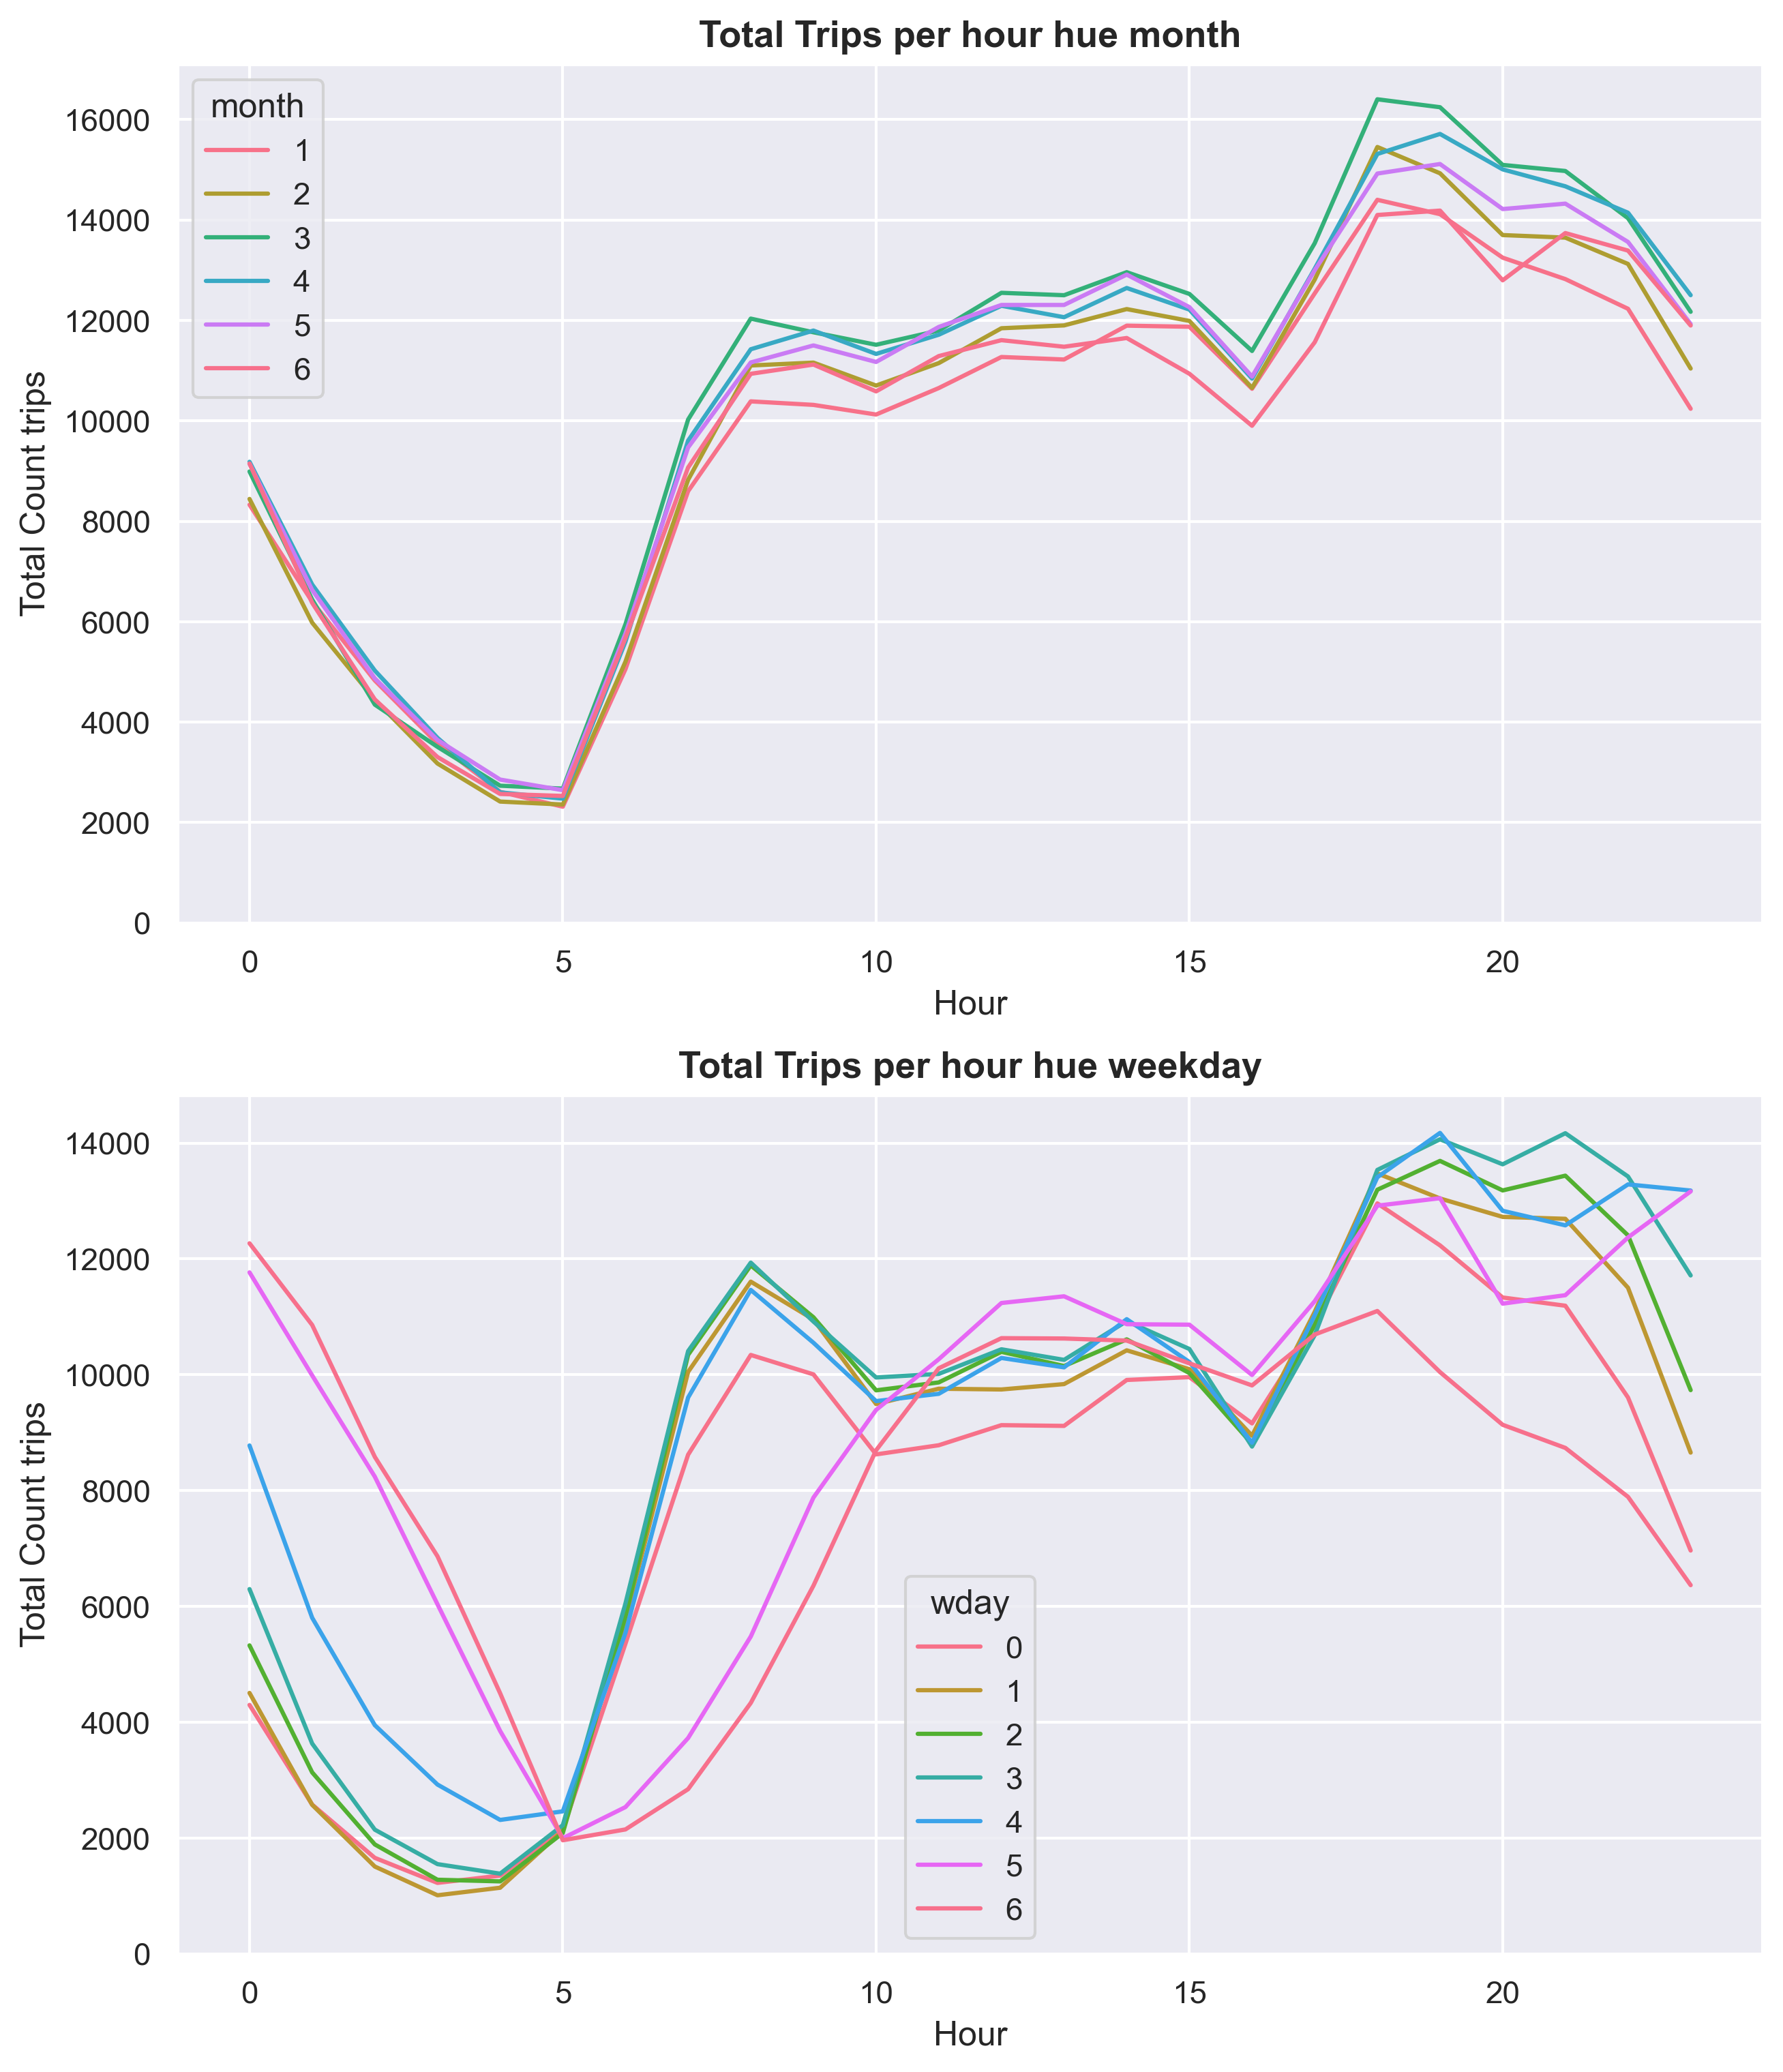

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12), dpi=300)

sns.lineplot(data=hour_month, x='hour', y='id', hue='month', palette='husl', ax=ax[0])

ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Total Count trips')
ax[0].set_title('Total Trips per hour hue month', size=13, weight='extra bold')

sns.lineplot(data=hour_wday, x='hour', y='id', hue='wday', palette='husl', ax=ax[1])

ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Total Count trips')
ax[1].set_title('Total Trips per hour hue weekday', size=13, weight='extra bold')

ax[0].set_ylim(0)
ax[1].set_ylim(0)

plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Никакие недели особо не выделяются, в зависимости от часа дня в разные недели люди ведут себя по разному, но в общем и целом картина одна и та же для любой недели. Похожая ситуация и с месяцами, но можно заметить в марте почти всегда для любого часа больше всего поездок с чем это связано - тяжело сказать. Очень сильно выделются времена суток: 3, 4, 5, 6 часов в это время мало поездок потому что люди спят, а в 17, 18, 19, 20, 21 часов поездок много, люди едут с работы.**

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

In [24]:
log_trip_duration_wday = df.groupby(df['pickup_datetime'].dt.weekday)['log_trip_duration'].mean()

log_trip_duration_mean_wday = log_trip_duration_wday.values
wdays = log_trip_duration_wday.index

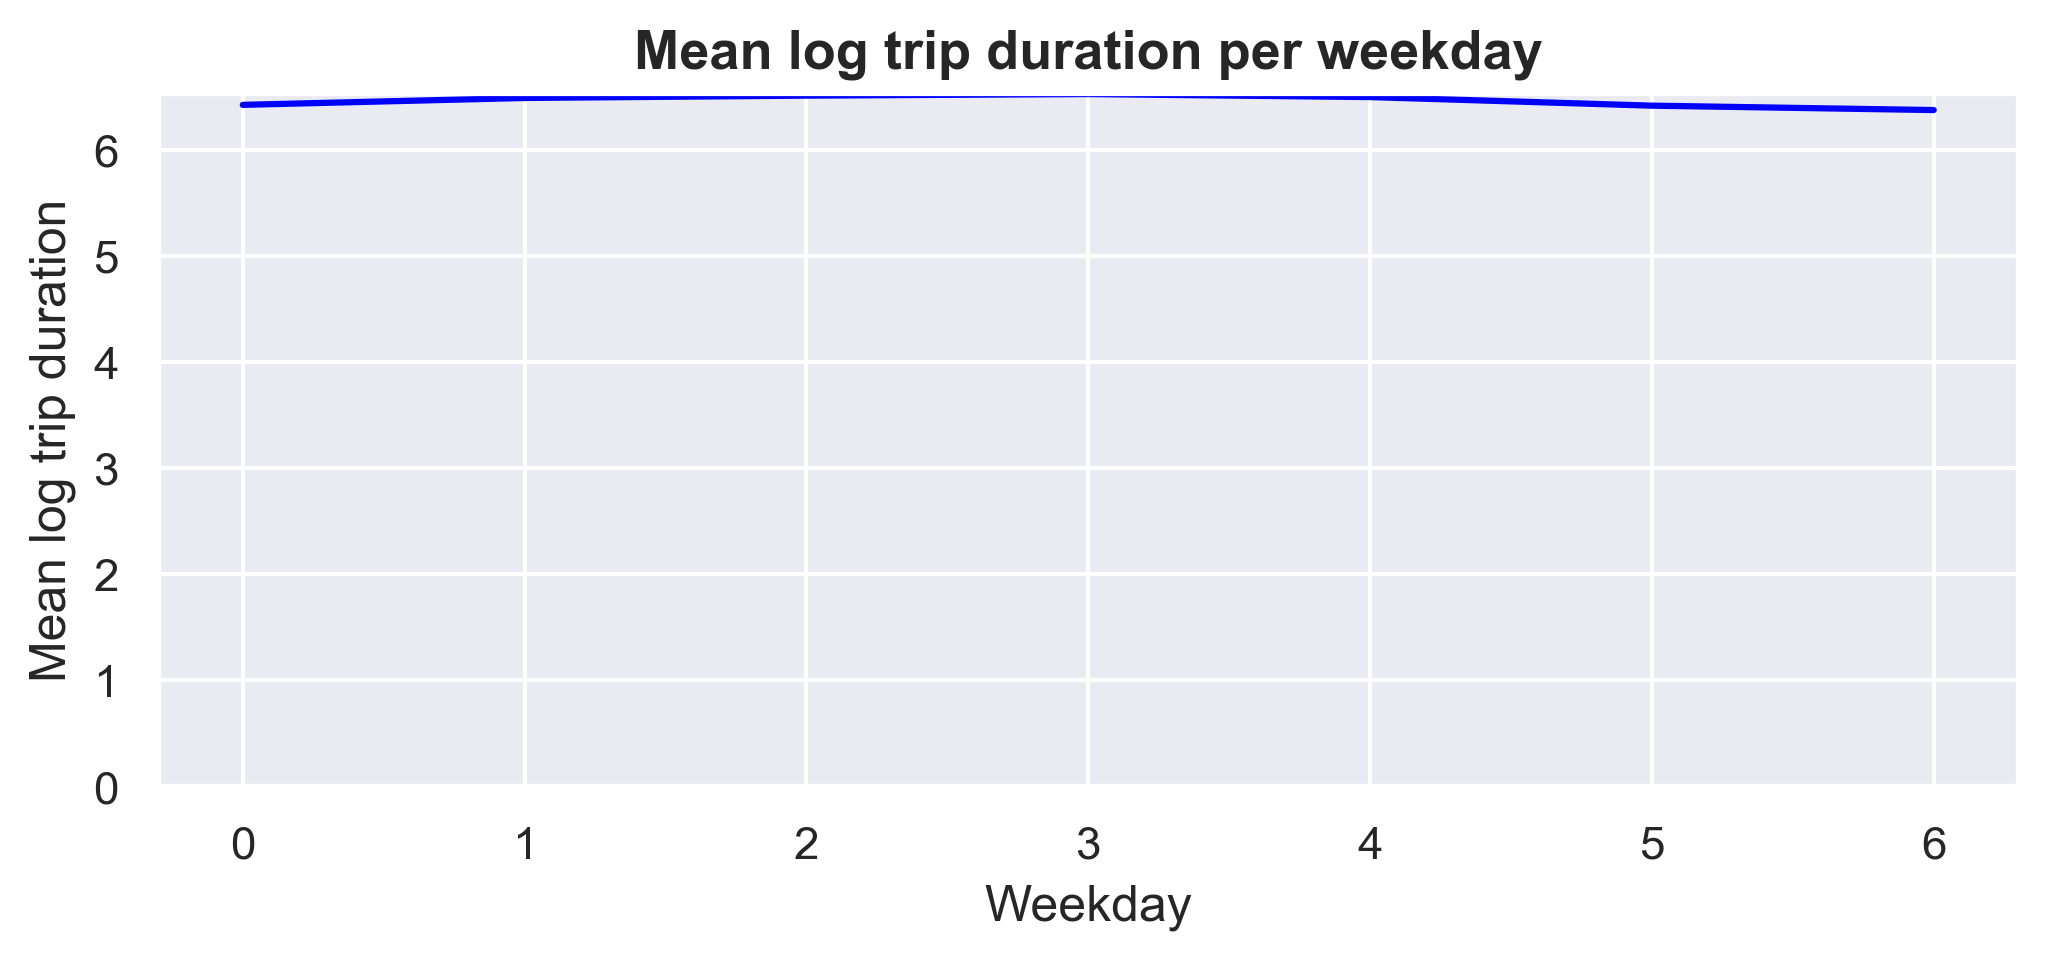

In [25]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot(wdays.values, log_trip_duration_mean_wday, color='blue')
ax.set_xlabel('Weekday')
ax.set_ylabel('Mean log trip duration')
ax.set_title('Mean log trip duration per weekday', size=13, weight='extra bold')

ax.set_ylim(0)

plt.show()

In [26]:
log_trip_duration_hour = df.groupby(df['pickup_datetime'].dt.hour)['log_trip_duration'].mean()

log_trip_duration_mean_hour = log_trip_duration_hour.values
hours = log_trip_duration_hour.index

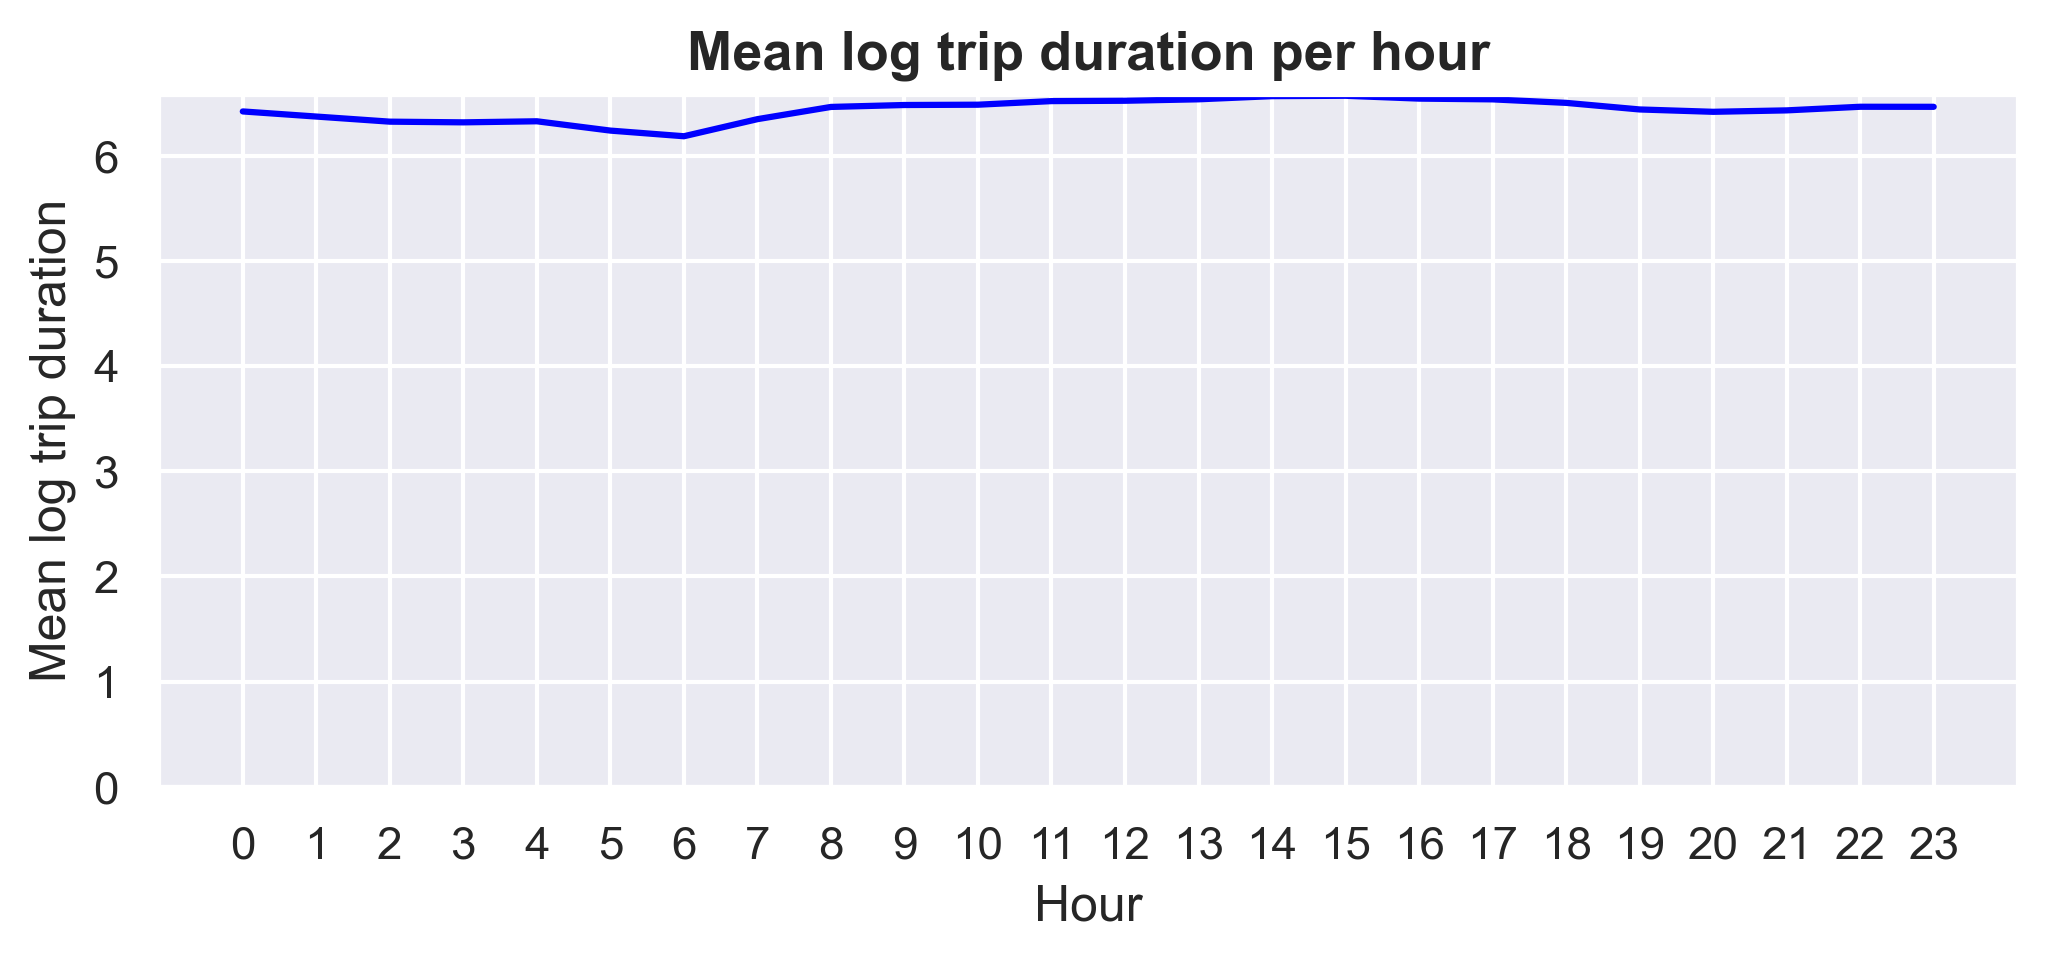

In [27]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot(hours.values, log_trip_duration_mean_hour, color='blue')
ax.set_xlabel('Hour')
ax.set_ylabel('Mean log trip duration')
ax.set_title('Mean log trip duration per hour', size=13, weight='extra bold')
ax.set_xticks(hours.values)
ax.set_ylim(0)

plt.show()

In [28]:
log_trip_duration_day = df.groupby(df['pickup_datetime'].dt.date)['log_trip_duration'].mean()

log_trip_duration_mean_day = log_trip_duration_day.values
days = log_trip_duration_day.index

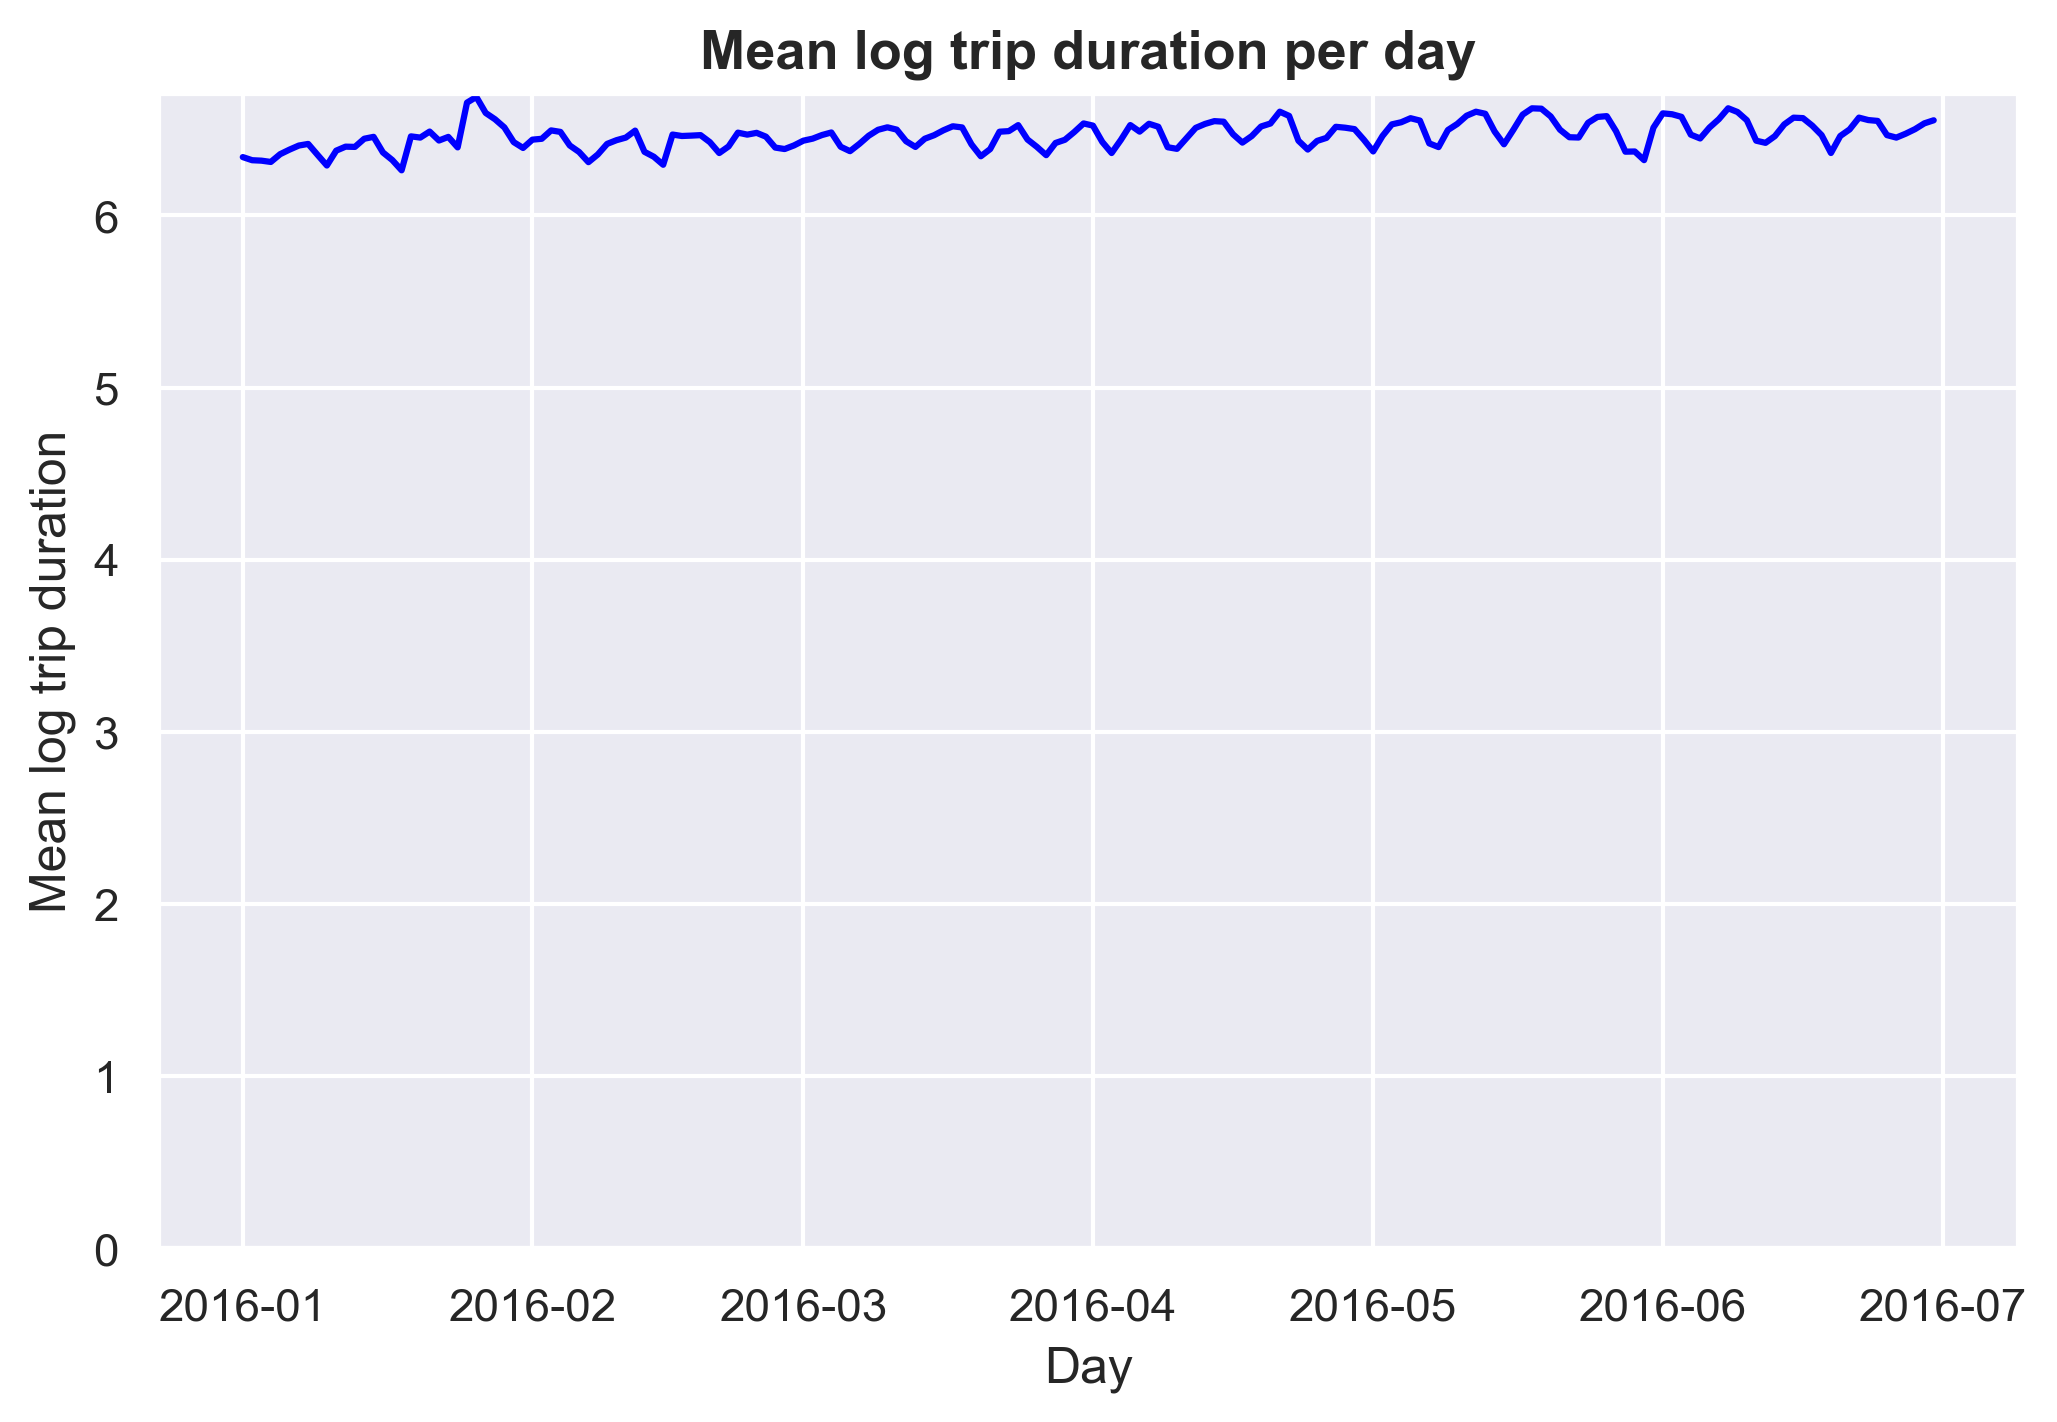

In [29]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.plot(days.values, log_trip_duration_mean_day, color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Mean log trip duration')
ax.set_title('Mean log trip duration per day', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Нет, графики совсем не похожи, во первых потому что логарифм на больших значениях не сильно меняется, а во вторых длина поездок не очень-то и должна зависить от времени, на это просто нет причин, которые есть в случае с числом поездок, довольно логично получается. Я вообще не наблюдаю тренда**

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [30]:
df_train['wday'] = df_train['pickup_datetime'].dt.weekday
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['hour'] = df_train['pickup_datetime'].dt.hour

df_train['snowfall'] = ((df_train['pickup_datetime'] >= '2016-01-23') 
                        & (df_train['pickup_datetime'] < '2016-01-26')
                       ).astype(int)

df_train['shooting'] = ((df_train['pickup_datetime'] >= '2016-05-30') 
                        & (df_train['pickup_datetime'] < '2016-05-31')
                       ).astype(int)

df_train['day'] = df_train['pickup_datetime'].dt.day_of_year

In [31]:
df_test['wday'] = df_test['pickup_datetime'].dt.weekday
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['hour'] = df_test['pickup_datetime'].dt.hour

df_test['snowfall'] = ((df_test['pickup_datetime'] >= '2016-01-23') 
                        & (df_test['pickup_datetime'] < '2016-01-26')
                       ).astype(int)

df_test['shooting'] = ((df_test['pickup_datetime'] >= '2016-05-30') 
                        & (df_test['pickup_datetime'] < '2016-05-31')
                       ).astype(int)
df_test['day'] = df_test['pickup_datetime'].dt.day_of_year

In [32]:
df_train

id  vendor_id     pickup_datetime  passenger_count  \
430252   id2968130          2 2016-02-15 00:52:17                2   
598829   id2358444          2 2016-03-22 12:04:34                2   
314731   id0408430          2 2016-03-14 16:03:08                1   
1342009  id2305944          2 2016-01-14 12:02:41                1   
673814   id2198653          1 2016-06-26 23:10:20                1   
...            ...        ...                 ...              ...   
359783   id1130068          2 2016-06-14 22:18:19                1   
152315   id3416393          1 2016-03-12 20:53:19                1   
963395   id2047807          1 2016-01-03 10:46:02                1   
117952   id1634041          1 2016-03-04 08:18:24                1   
305711   id3155472          2 2016-03-03 21:49:00                2   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
430252         -73.934586        40.797016         -73.917397   
598829         -73.957748        40.764500         -73.978706   
314731         -73.982857        40.730961         -73.980171   
1342009        -73.982262        40.771389         -73.979973   
673814         -73.991264        40.749748         -73.976517   
...                   ...              ...                ...   
359783         -73.872879        40.774052         -73.925018   
152315         -73.985619        40.757359         -73.987984   
963395         -73.994186        40.755886         -74.016571   
117952         -73.982277        40.765305         -73.973473   
305711         -74.005898        40.736099         -73.995026   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  wday  month  \
430252          40.834545                  N           6.100319     0      2   
598829          40.758430                  N           7.047517     1      3   
314731          40.734741                  N           3.806662     0      3   
1342009         40.786072                  N           5.783825     3      1   
673814          40.749260                  N           6.084499     6      6   
...                   ...                ...                ...   ...    ...   
359783          40.759640                  N           6.527958     1      6   
152315          40.757030                  N           4.962845     5      3   
963395          40.704746                  N           6.903747     6      1   
117952          40.757809                  N           6.711740     4      3   
305711          40.749981                  N           5.961005     3      3   

         hour  snowfall  shooting  day  
430252      0         0         0   46  
598829     12         0         0   82  
314731     16         0         0   74  
1342009    12         0         0   14  
673814     23         0         0  178  
...       ...       ...       ...  ...  
359783     22         0         0  166  
152315     20         0         0   72  
963395     10         0         0    3  
117952      8         0         0   64  
305711     21         0         0   63  

[1021050 rows x 16 columns]

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Число пассажиров, широту, долготу нужно рассматривать как числовые, потому что над ними имеет смысл производить арифметические операции, (например рассчитывать растояние по широте и долготе; считать среднее число пассажиров)
Остальные признаки следует рассматривать категориальными, потому что над ними не имеет смысл делать арифметические операции, даже если у нас есть месяц, неделя или час - это всего лишь числовые метки категориальных признаков**

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

Кодируем признаки

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols = list(df_train.drop(columns=['id', 
                                  'pickup_datetime', 
                                  'log_trip_duration',
                                  'passenger_count', 
                                  'pickup_longitude', 
                                  'pickup_latitude', 
                                  'dropoff_longitude',
                                  'dropoff_latitude']).columns)

real_cols = ['passenger_count', 
             'pickup_longitude', 
             'pickup_latitude', 
             'dropoff_longitude',
             'dropoff_latitude']

ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols), 
                       ('ss', StandardScaler(), real_cols)], remainder='passthrough')


X_train = ct.fit_transform(df_train.drop(columns=['log_trip_duration']))
X_test = ct.transform(df_test.drop(columns=['log_trip_duration']))

y_train = df_train['log_trip_duration']
y_test = df_test['log_trip_duration']

Обучаем на только что выделенных признаках

In [34]:
ct.get_feature_names_out() # это признаки с индексами от 2 до 218 включительно

array(['ohe__vendor_id_2', 'ohe__store_and_fwd_flag_Y', 'ohe__wday_1',
       'ohe__wday_2', 'ohe__wday_3', 'ohe__wday_4', 'ohe__wday_5',
       'ohe__wday_6', 'ohe__month_2', 'ohe__month_3', 'ohe__month_4',
       'ohe__month_5', 'ohe__month_6', 'ohe__hour_1', 'ohe__hour_2',
       'ohe__hour_3', 'ohe__hour_4', 'ohe__hour_5', 'ohe__hour_6',
       'ohe__hour_7', 'ohe__hour_8', 'ohe__hour_9', 'ohe__hour_10',
       'ohe__hour_11', 'ohe__hour_12', 'ohe__hour_13', 'ohe__hour_14',
       'ohe__hour_15', 'ohe__hour_16', 'ohe__hour_17', 'ohe__hour_18',
       'ohe__hour_19', 'ohe__hour_20', 'ohe__hour_21', 'ohe__hour_22',
       'ohe__hour_23', 'ohe__snowfall_1', 'ohe__shooting_1', 'ohe__day_2',
       'ohe__day_3', 'ohe__day_4', 'ohe__day_5', 'ohe__day_6',
       'ohe__day_7', 'ohe__day_8', 'ohe__day_9', 'ohe__day_10',
       'ohe__day_11', 'ohe__day_12', 'ohe__day_13', 'ohe__day_14',
       'ohe__day_15', 'ohe__day_16', 'ohe__day_17', 'ohe__day_18',
       'ohe__day_19', 'ohe__day_20', 'o

In [35]:
from sklearn.linear_model import Ridge

est = Ridge()

est.fit(X_train[:, 2:219], y_train)

y_pred = est.predict(X_test[:, 2:219])

In [36]:
print(f'RMSLE {rmsle(y_test, y_pred)}') # чуть лучше константы

RMSLE 0.7855901137421447


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [37]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [38]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [39]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Сильно выделяются точки ведущие в аэропорт между Elizabeth и Newark; также выделяются точки в I95, BP, Queens Country, Inwood, Glen Cove и Richmond Country. Я их выбрал потому что они слишком далеко от Нью Йорка. Эти наблюдения нетипичны и скорее всего являются выбросами.**

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [40]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [41]:
df_train['haversine'] = haversine_array(df_train['pickup_latitude'].values, 
                                                 df_train['pickup_longitude'].values, 
                                                 df_train['dropoff_latitude'].values, 
                                                 df_train['dropoff_longitude'].values)

df_test['haversine'] = haversine_array(df_test['pickup_latitude'].values, 
                                                 df_test['pickup_longitude'].values, 
                                                 df_test['dropoff_latitude'].values, 
                                                 df_test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [42]:
df_train['log_haversine'] = np.log1p(df_train['haversine'].values)

df_test['log_haversine'] = np.log1p(df_test['haversine'].values)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [43]:
your_df = df_train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [44]:
mean_speed = df_train['haversine'].values / np.expm1(y_train)

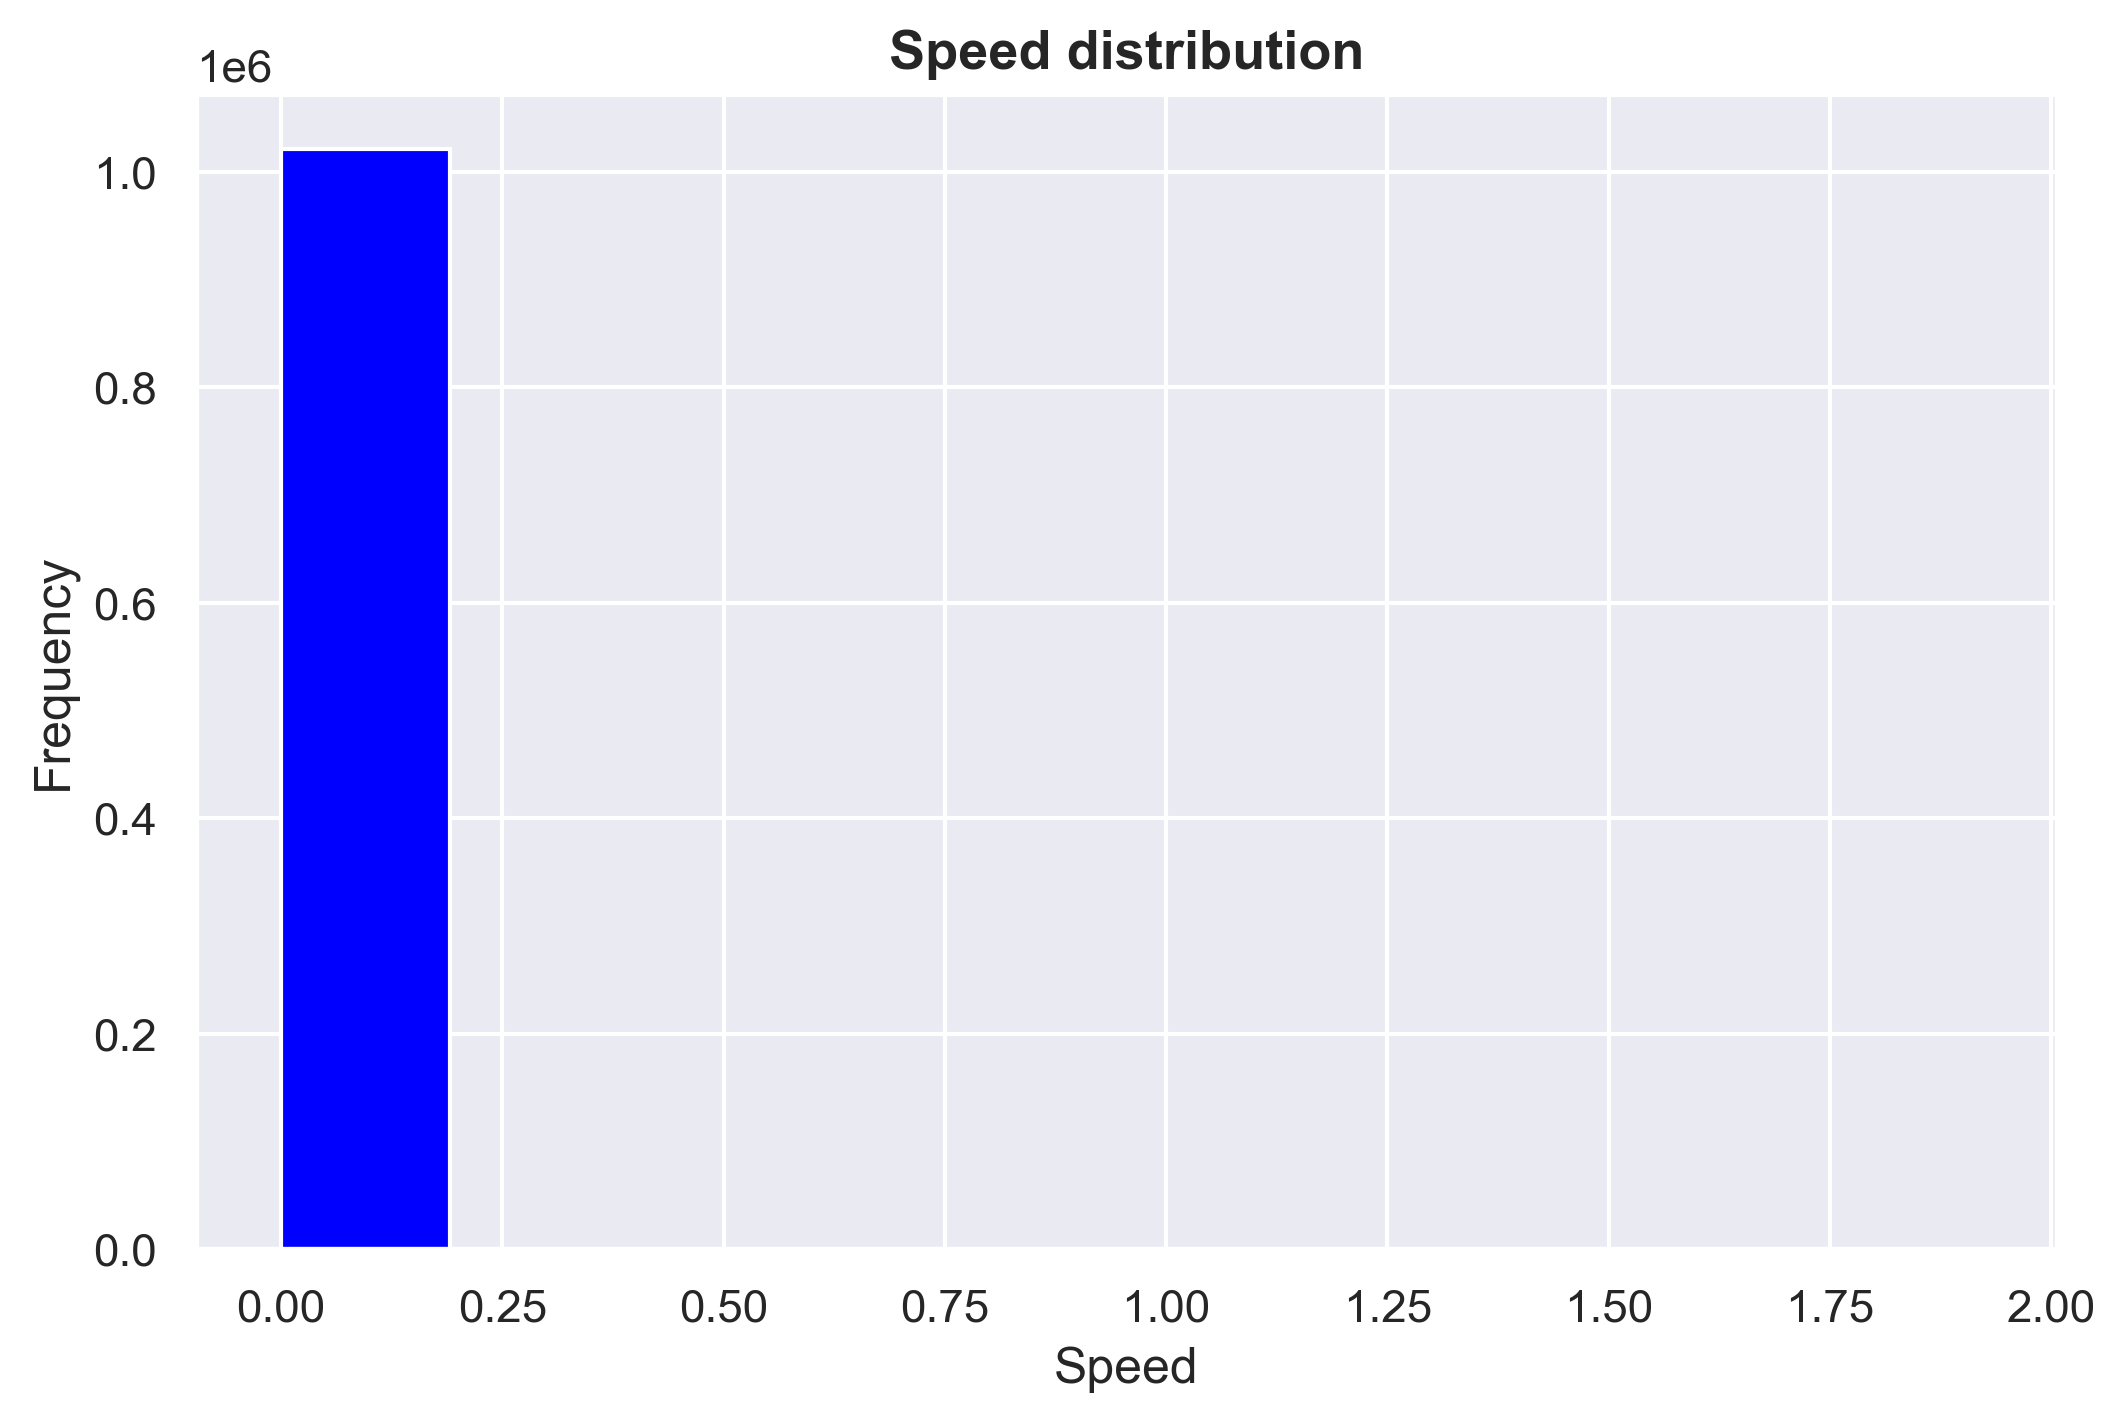

In [45]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(mean_speed, color='blue')

ax.set_xlabel('Speed')
ax.set_ylabel('Frequency')
ax.set_title('Speed distribution', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [46]:
relevant_speed = mean_speed[mean_speed < mean_speed.quantile(0.99)]

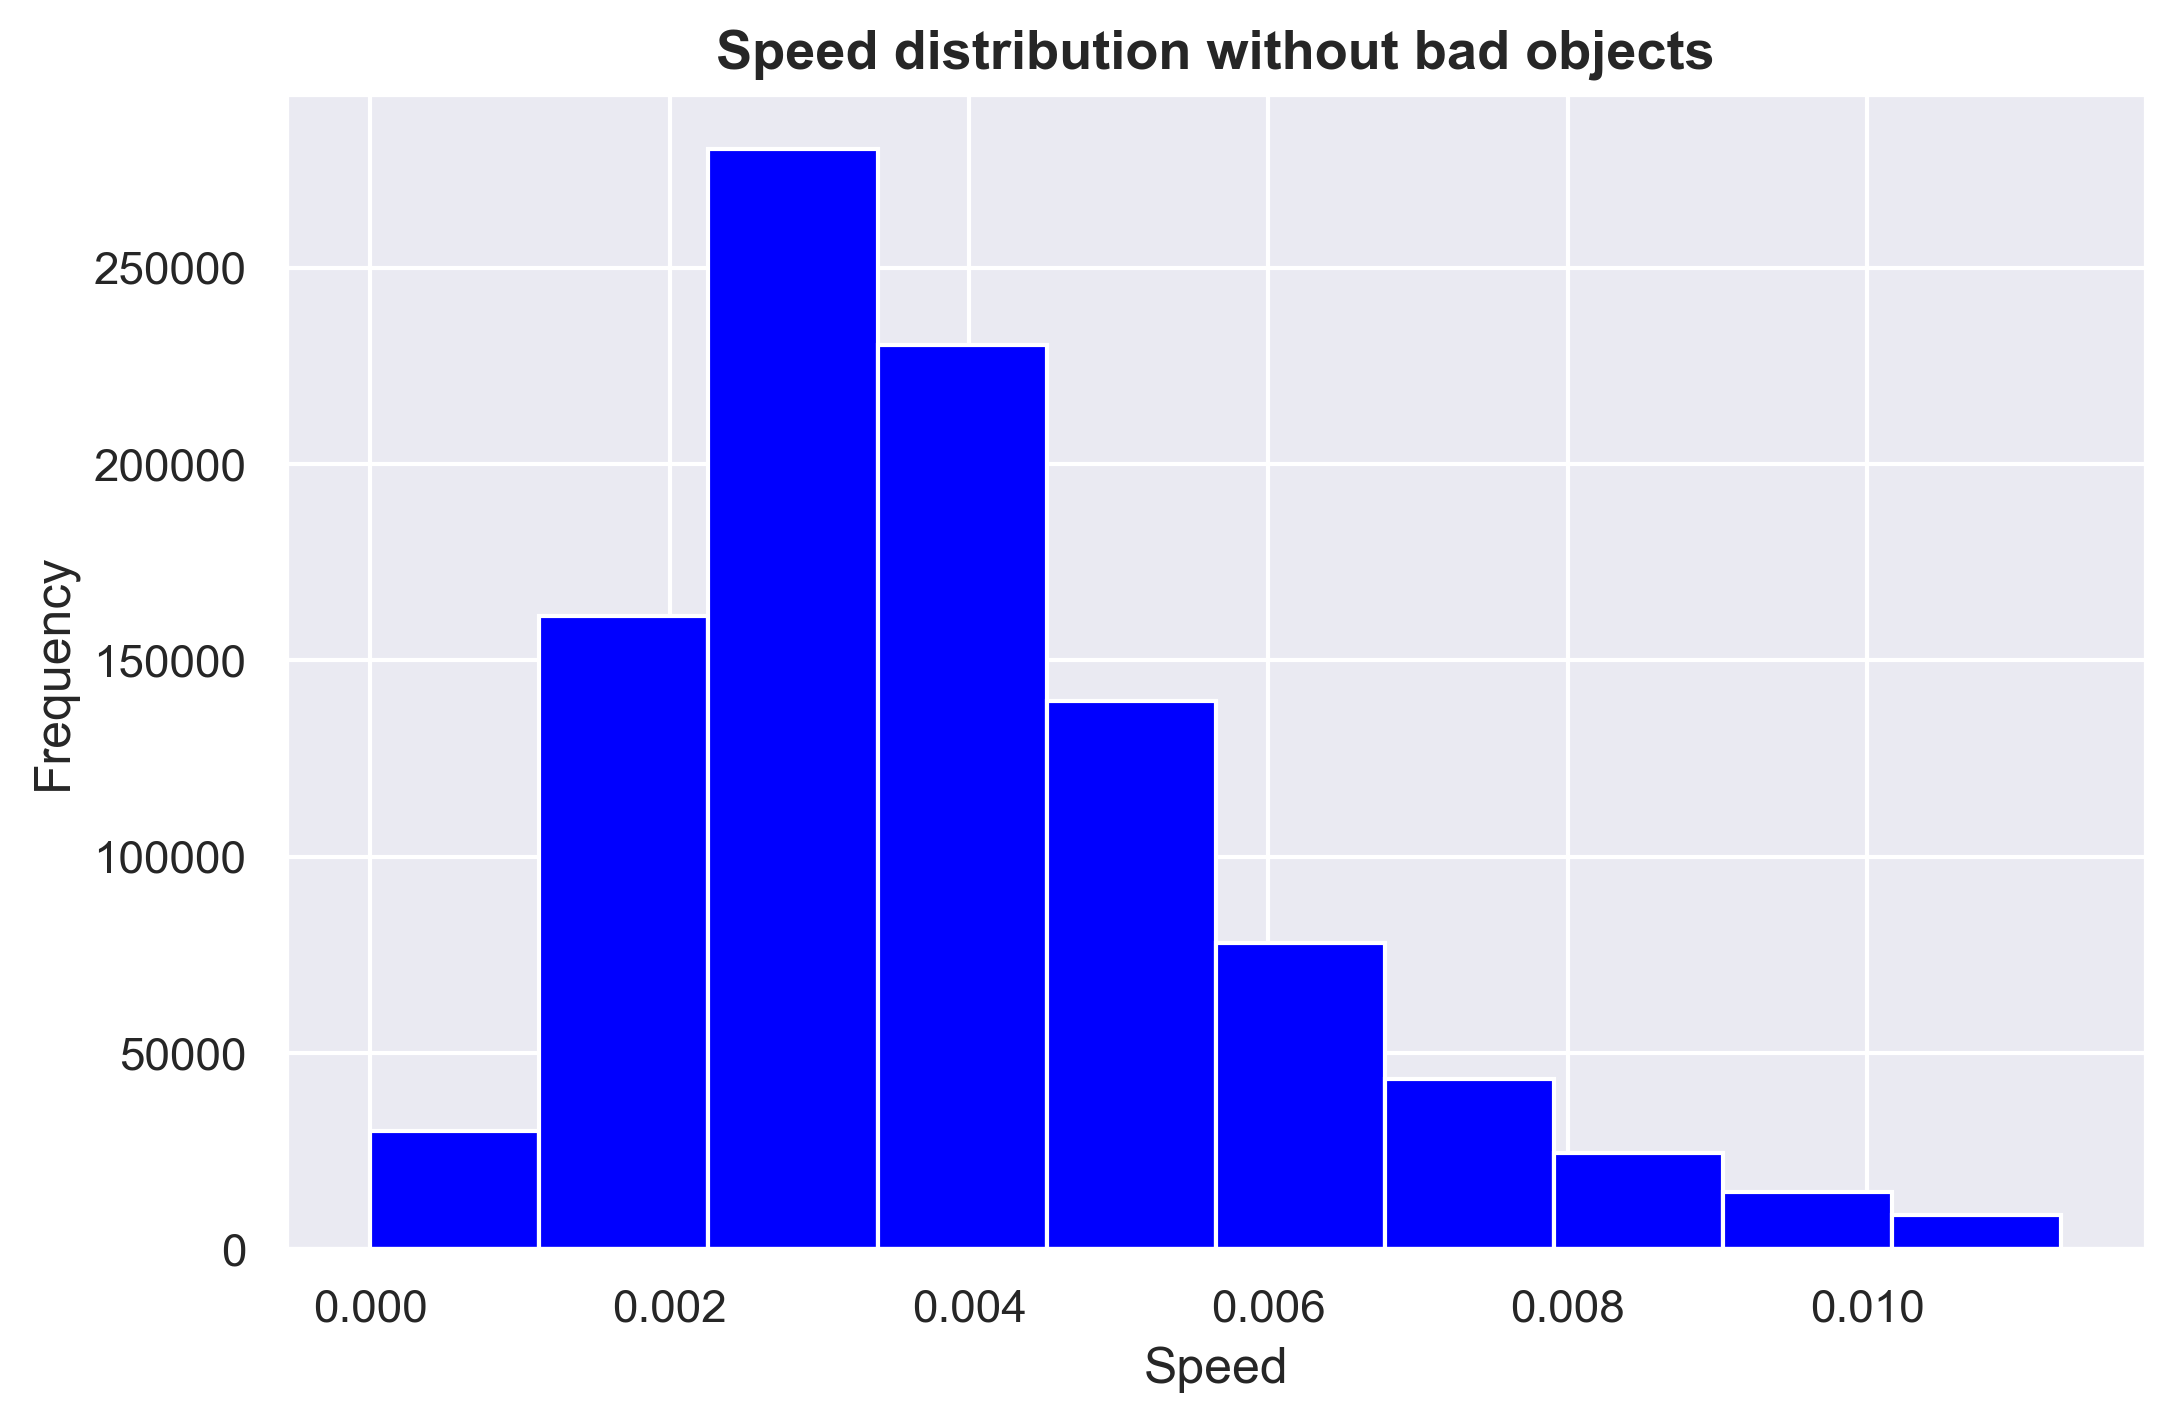

In [47]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(relevant_speed, color='blue')

ax.set_xlabel('Speed')
ax.set_ylabel('Frequency')
ax.set_title('Speed distribution without bad objects', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [48]:
df_train['mean_speed'] = mean_speed

In [49]:
heatmap = df_train.pivot_table(values='mean_speed', index='wday', columns=['hour'], aggfunc='median')

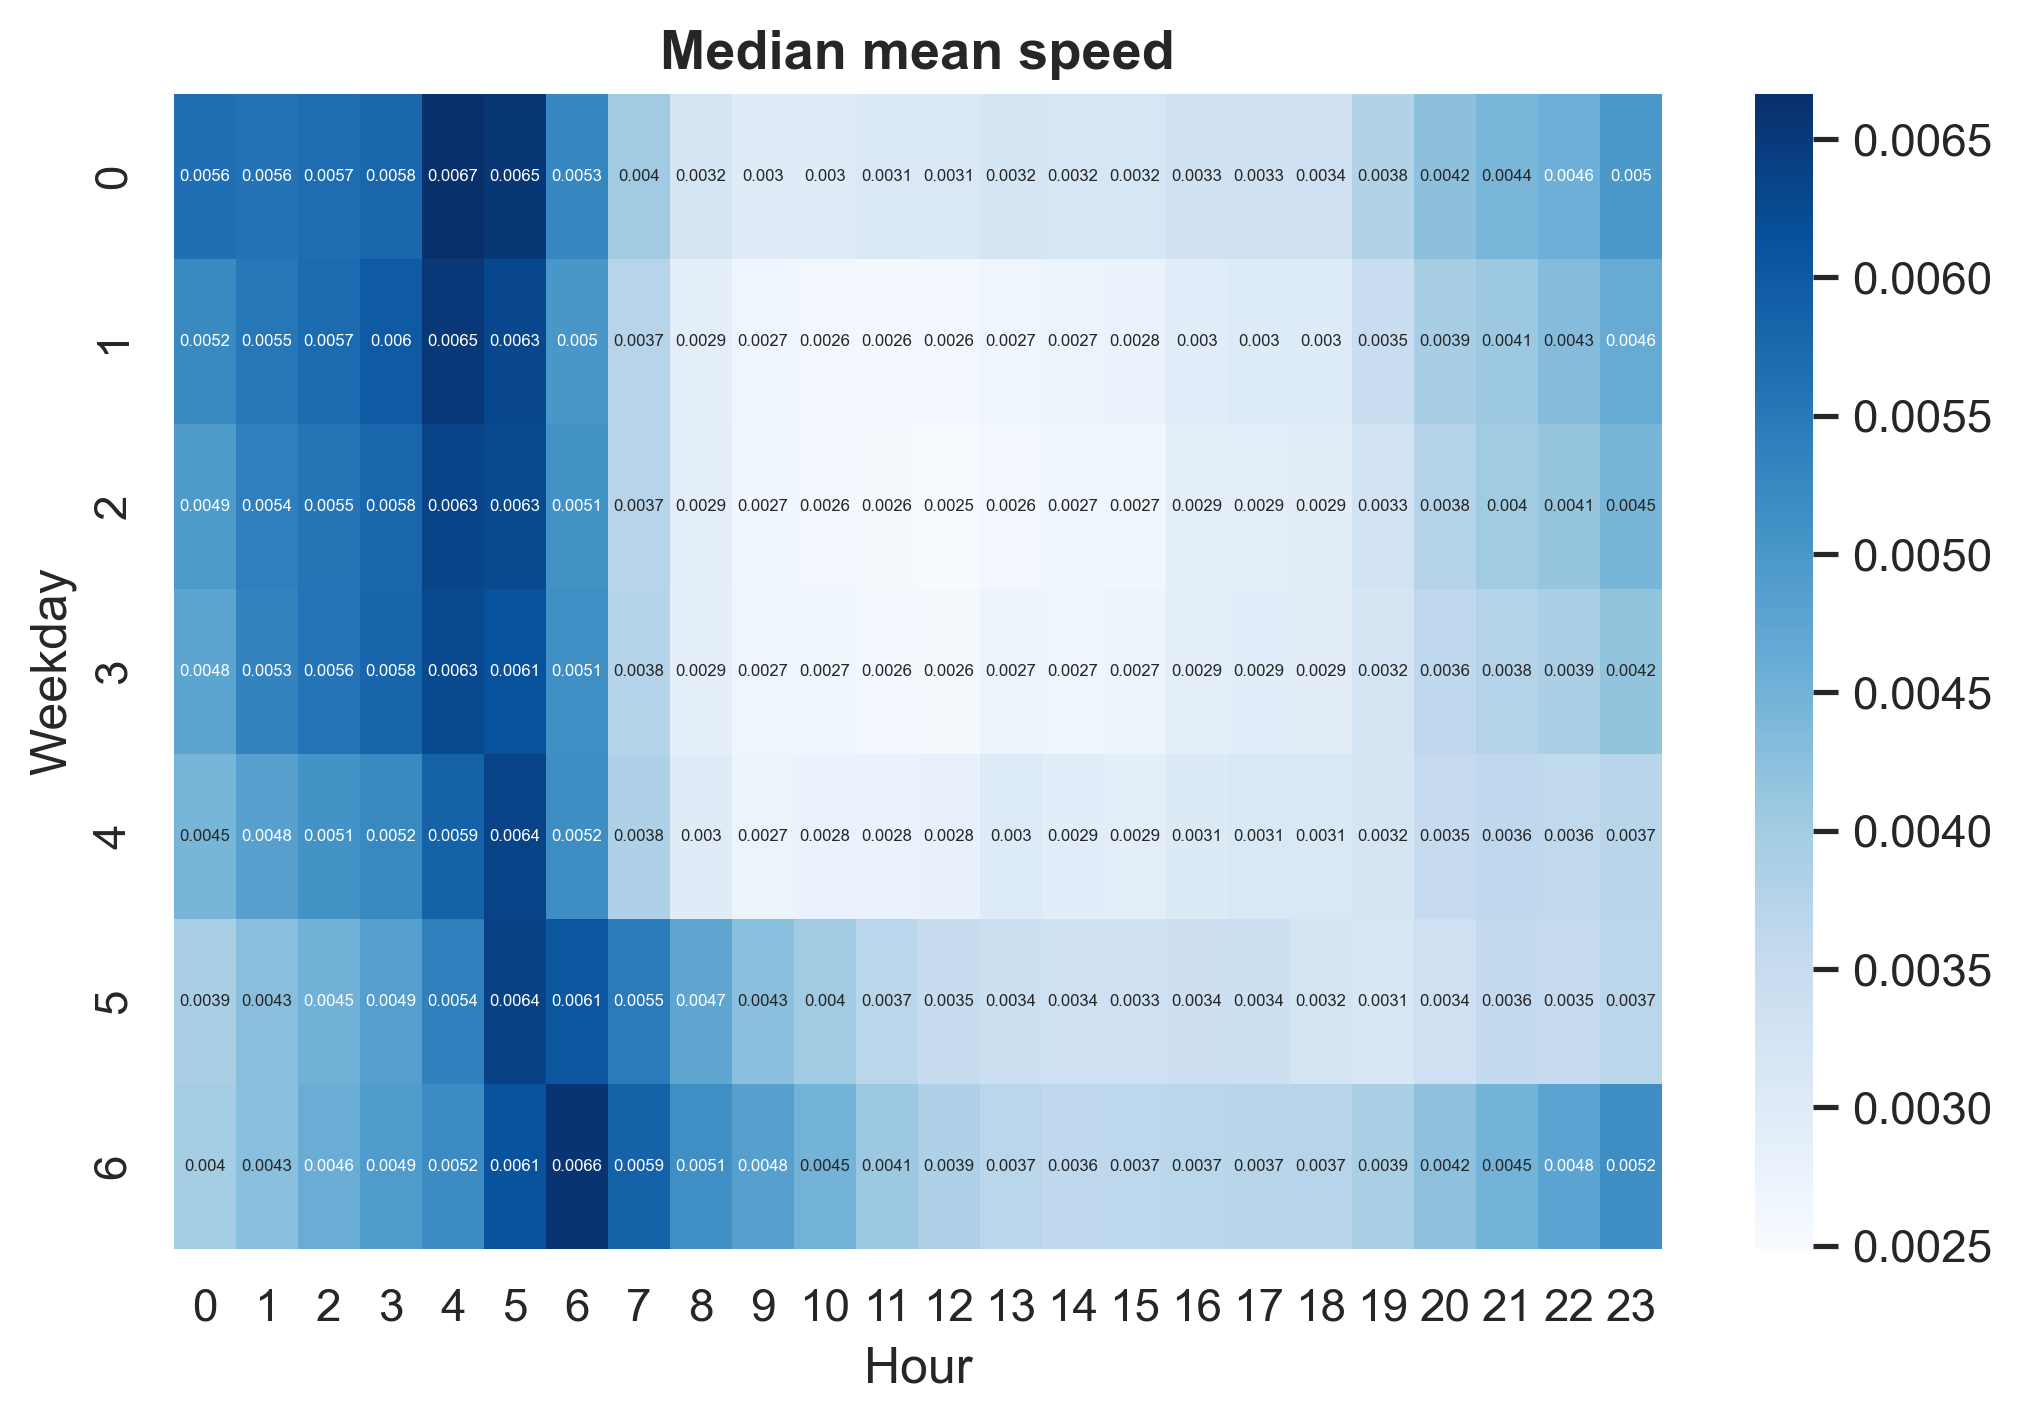

In [50]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

sns.heatmap(heatmap, ax=ax, annot=True, cmap='Blues' ,annot_kws={'fontsize':4})

ax.set_xlabel('Hour')
ax.set_ylabel('Weekday')
ax.set_title('Median mean speed', size=13, weight='extra bold')

plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?  

**Потому что чтобы его рассчитать мы использовали целевую переменную, которой у нас нет для новых данных, поэтому мы не сможем посчитать этот признак для новых объектов**

In [51]:
df_train.drop(columns='mean_speed', inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Скорость максимальна ранним утром, когда все спят, особенно в понедельник, самые низкие скорости в рабочие часы причём в первой половине недели (почти белая область на графике)** 

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [52]:
df_train['jam_time'] = ((df_train['wday'] < 5) 
                        & (df_train['hour'] < 19) 
                        & (df_train['hour'] > 7)
                       ).astype(int)

df_train['free_time'] = ((df_train['wday'] < 5) 
                        & ((df_train['hour'] == 4) | (df_train['hour'] == 5))
                       ).astype(int)

In [53]:
df_test['jam_time'] = ((df_test['wday'] < 5) 
                        & (df_test['hour'] < 19) 
                        & (df_test['hour'] > 7)
                       ).astype(int)

df_test['free_time'] = ((df_test['wday'] < 5) 
                        & ((df_test['hour'] == 4) | (df_test['hour'] == 5))
                       ).astype(int)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

**Потому что в таких поездах будет долгое время поездки, так как эти населённые пункты находятся далеко**

In [54]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [310]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, horizontal_cnt, vertical_cnt, vbot_q, hbot_q, vtop_q, htop_q):
        self.horizontal_cnt = horizontal_cnt # количества бинов
        self.vertical_cnt = vertical_cnt
        self.vbot_q = vbot_q # квантили по которым будем определять типичные наблюдения
        self.hbot_q = hbot_q
        self.vtop_q = vtop_q
        self.htop_q = htop_q
        
#     def show_map(self):
#         # you may want to visualize cells
#         pass
    
    def fit(self, X=None, y=None):
        vertical_cords = X[:, 0]
        horizontal_cords = X[:, 0]
        
        vertical_bot_border = np.quantile(vertical_cords, self.vbot_q)
        vertical_top_border = np.quantile(vertical_cords, self.vtop_q)
        
        horizontal_bot_border = np.quantile(horizontal_cords, self.hbot_q)
        horizontal_top_border = np.quantile(horizontal_cords, self.htop_q)
        
        self.hotizontal_edges = np.linspace(horizontal_bot_border, horizontal_top_border, self.horizontal_cnt)
        self.vertical_edges = np.linspace(vertical_bot_border, vertical_top_border, self.vertical_cnt)
        
        return self

    def transform(self, X, y=None):
        vertical_cords = X[:, 0]
        horizontal_cords = X[:, 0]
        
        find_vert_bin = lambda vert_cord: np.searchsorted(self.vertical_edges, vert_cord)
        find_vert_bins = np.vectorize(find_vert_bin)
        
        find_horiz_bin = lambda horiz_cord: np.searchsorted(self.hotizontal_edges, horiz_cord)
        find_horiz_bins = np.vectorize(find_horiz_bin)
        
        vert_bins = find_vert_bins(vertical_cords)
        horiz_bins = find_horiz_bins(horizontal_cords)
        
        self.vert_bins = vert_bins
        self.horiz_bins = horiz_bins
        
        return vert_bins, horiz_bins
    
    def get_bin_label(self):
        vert_labels = self.vert_bins
        horiz_labels = self.horiz_bins
        
        construct_label = lambda vl, hl: f'{vl}_{hl}'
        construct_labels = np.vectorize(construct_label)
        
        self.labels = construct_labels(vert_labels, horiz_labels)
        
        return self.labels

In [311]:
trans = MapGridTransformer(3, 4, 0.05, 0.05, 0.95, 0.95)

In [312]:
X_pickup = np.asarray(df_train[['pickup_latitude', 'pickup_longitude']])
X_dropoff = np.asarray(df_train[['dropoff_latitude', 'dropoff_longitude']])
X = np.concatenate((X_pickup, X_dropoff))

trans.fit(X)

trans.transform(X_pickup)
pickup = trans.get_bin_label()

trans.transform(X_dropoff)
dropoff = trans.get_bin_label()

df_train['pickup_zone'] = pickup
df_train['dropoff_zone'] = dropoff

In [313]:
X_pickup = np.asarray(df_test[['pickup_latitude', 'pickup_longitude']])
X_dropoff = np.asarray(df_test[['dropoff_latitude', 'dropoff_longitude']])

trans.transform(X_pickup)
pickup = trans.get_bin_label()

trans.transform(X_dropoff)
dropoff = trans.get_bin_label()

df_test['pickup_zone'] = pickup
df_test['dropoff_zone'] = dropoff

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.  

**Вендор может быть полезным так как разные вендоры могут специализироваться на разных типах поездок. Число пассажиров влияет на размер машины, а следовательно и на её параметры (в тч скорость), последний признак не знаю  что такое**

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [54]:
print(f"'vendor_id' :{len(df_train['vendor_id'].unique())}")
print(f"'passenger_count' :{len(df_train['passenger_count'].unique())}")
print(f"'store_and_fwd_flag' :{len(df_train['store_and_fwd_flag'].unique())}")

'vendor_id' :2
'passenger_count' :10
'store_and_fwd_flag' :2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

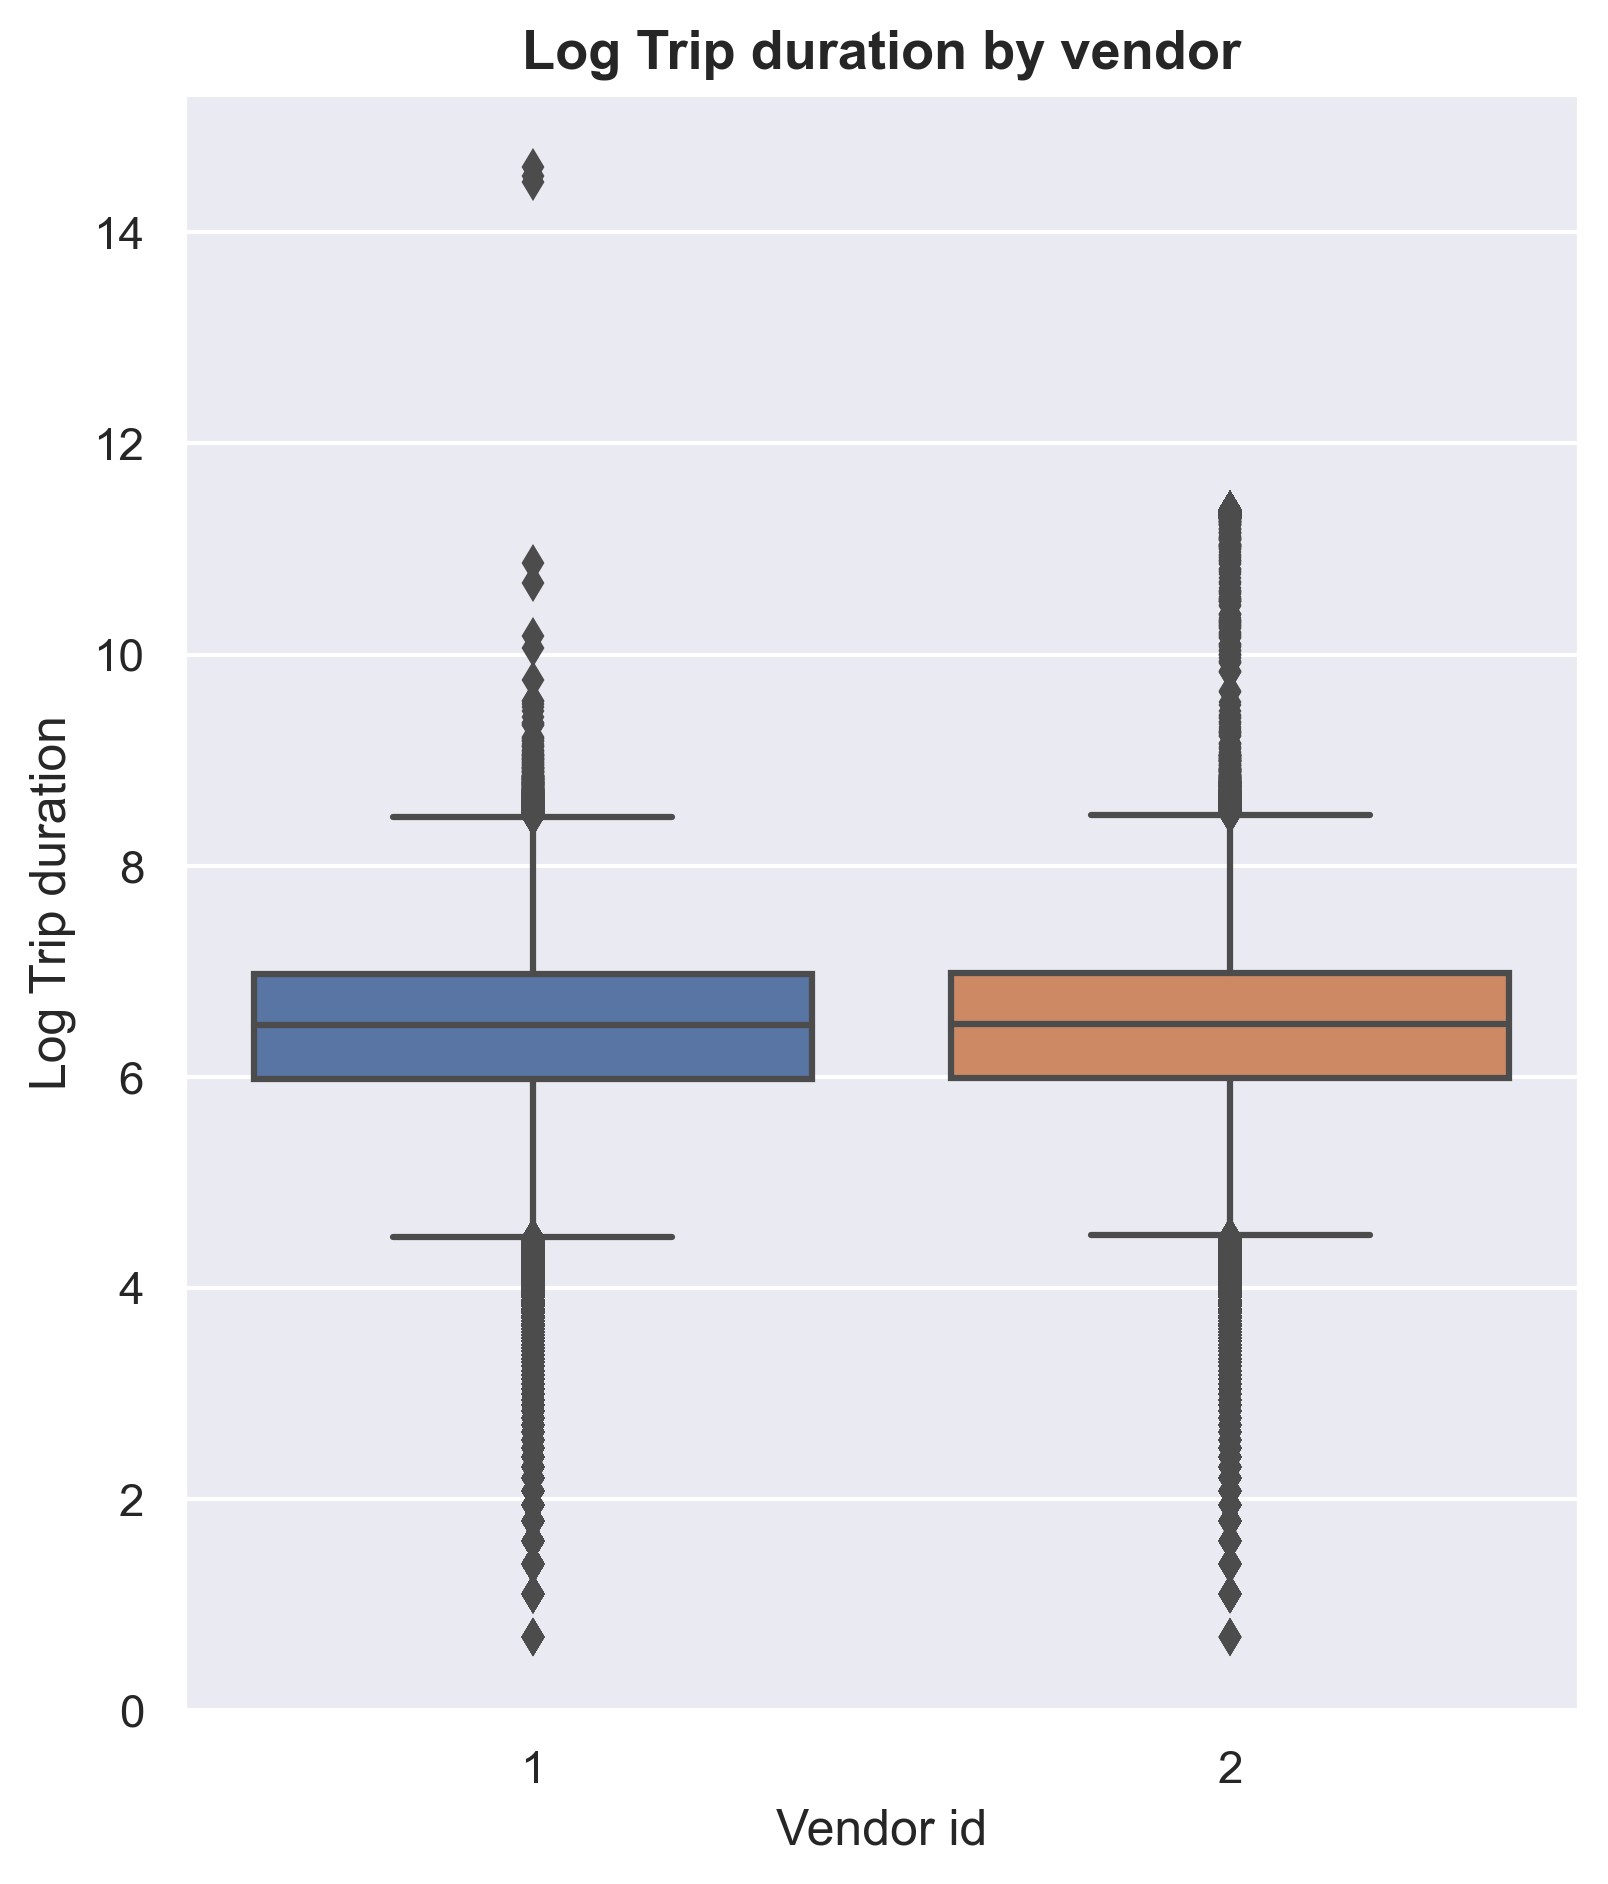

In [55]:
fig, ax = plt.subplots(figsize=(6, 7), dpi=300)

sns.boxplot(data=df_train, x='vendor_id', y='log_trip_duration', ax=ax)

ax.set_xlabel('Vendor id')
ax.set_ylabel('Log Trip duration')
ax.set_title('Log Trip duration by vendor', size=13, weight='extra bold')

plt.show()

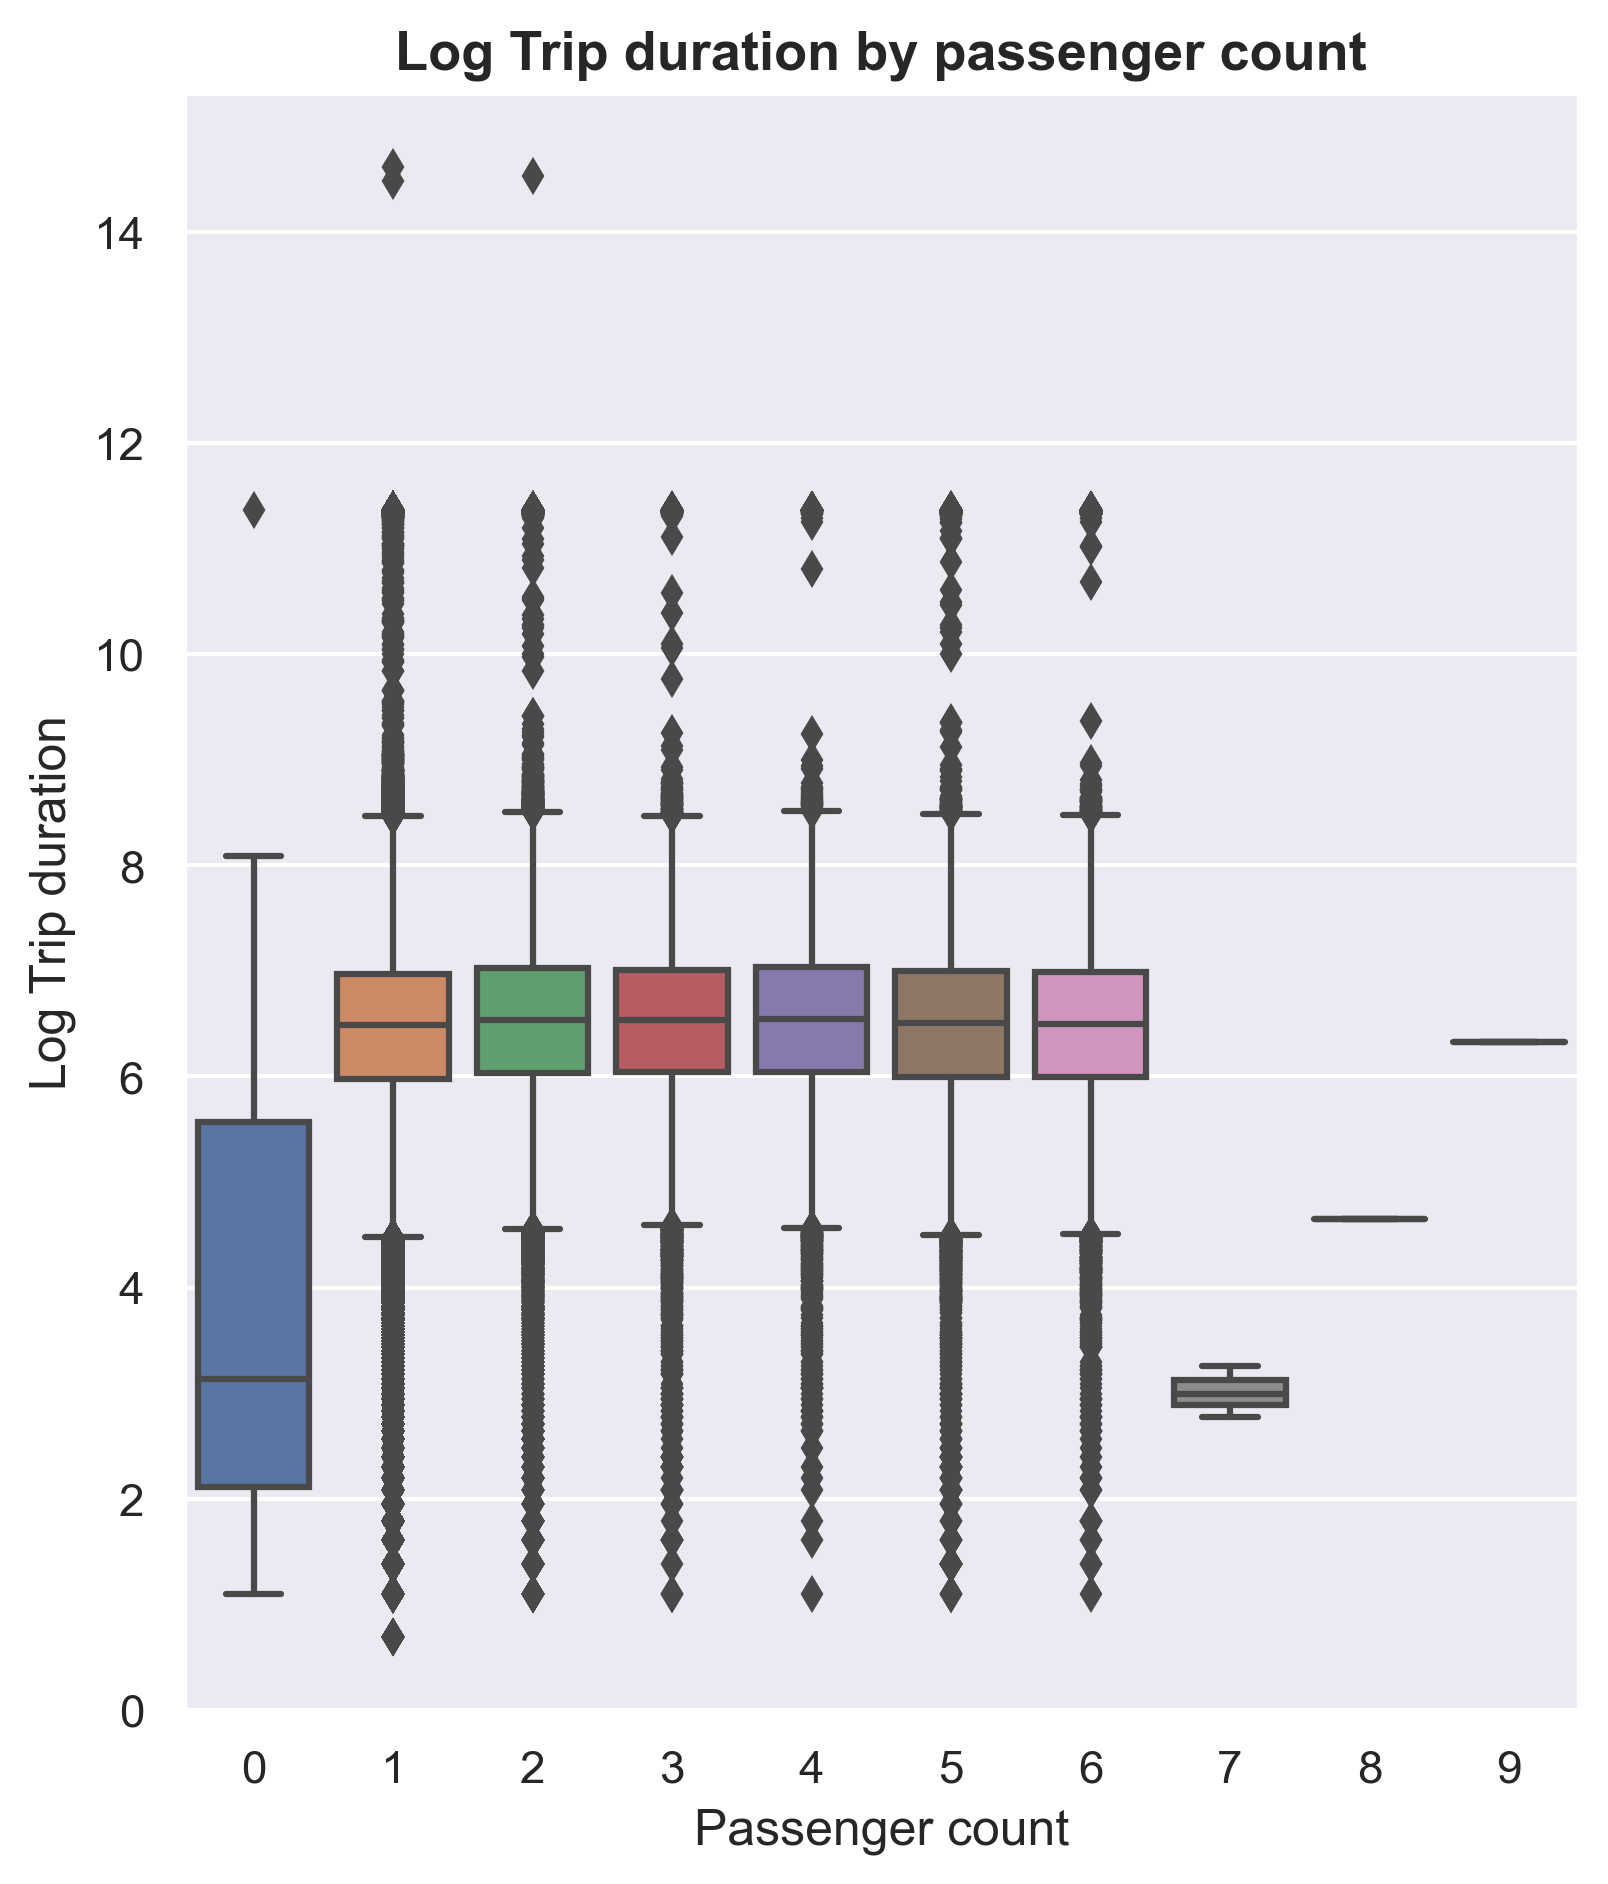

In [56]:
fig, ax = plt.subplots(figsize=(6, 7), dpi=300)

sns.boxplot(data=df_train, x='passenger_count', y='log_trip_duration', ax=ax)

ax.set_xlabel('Passenger count')
ax.set_ylabel('Log Trip duration')
ax.set_title('Log Trip duration by passenger count', size=13, weight='extra bold')

plt.show()

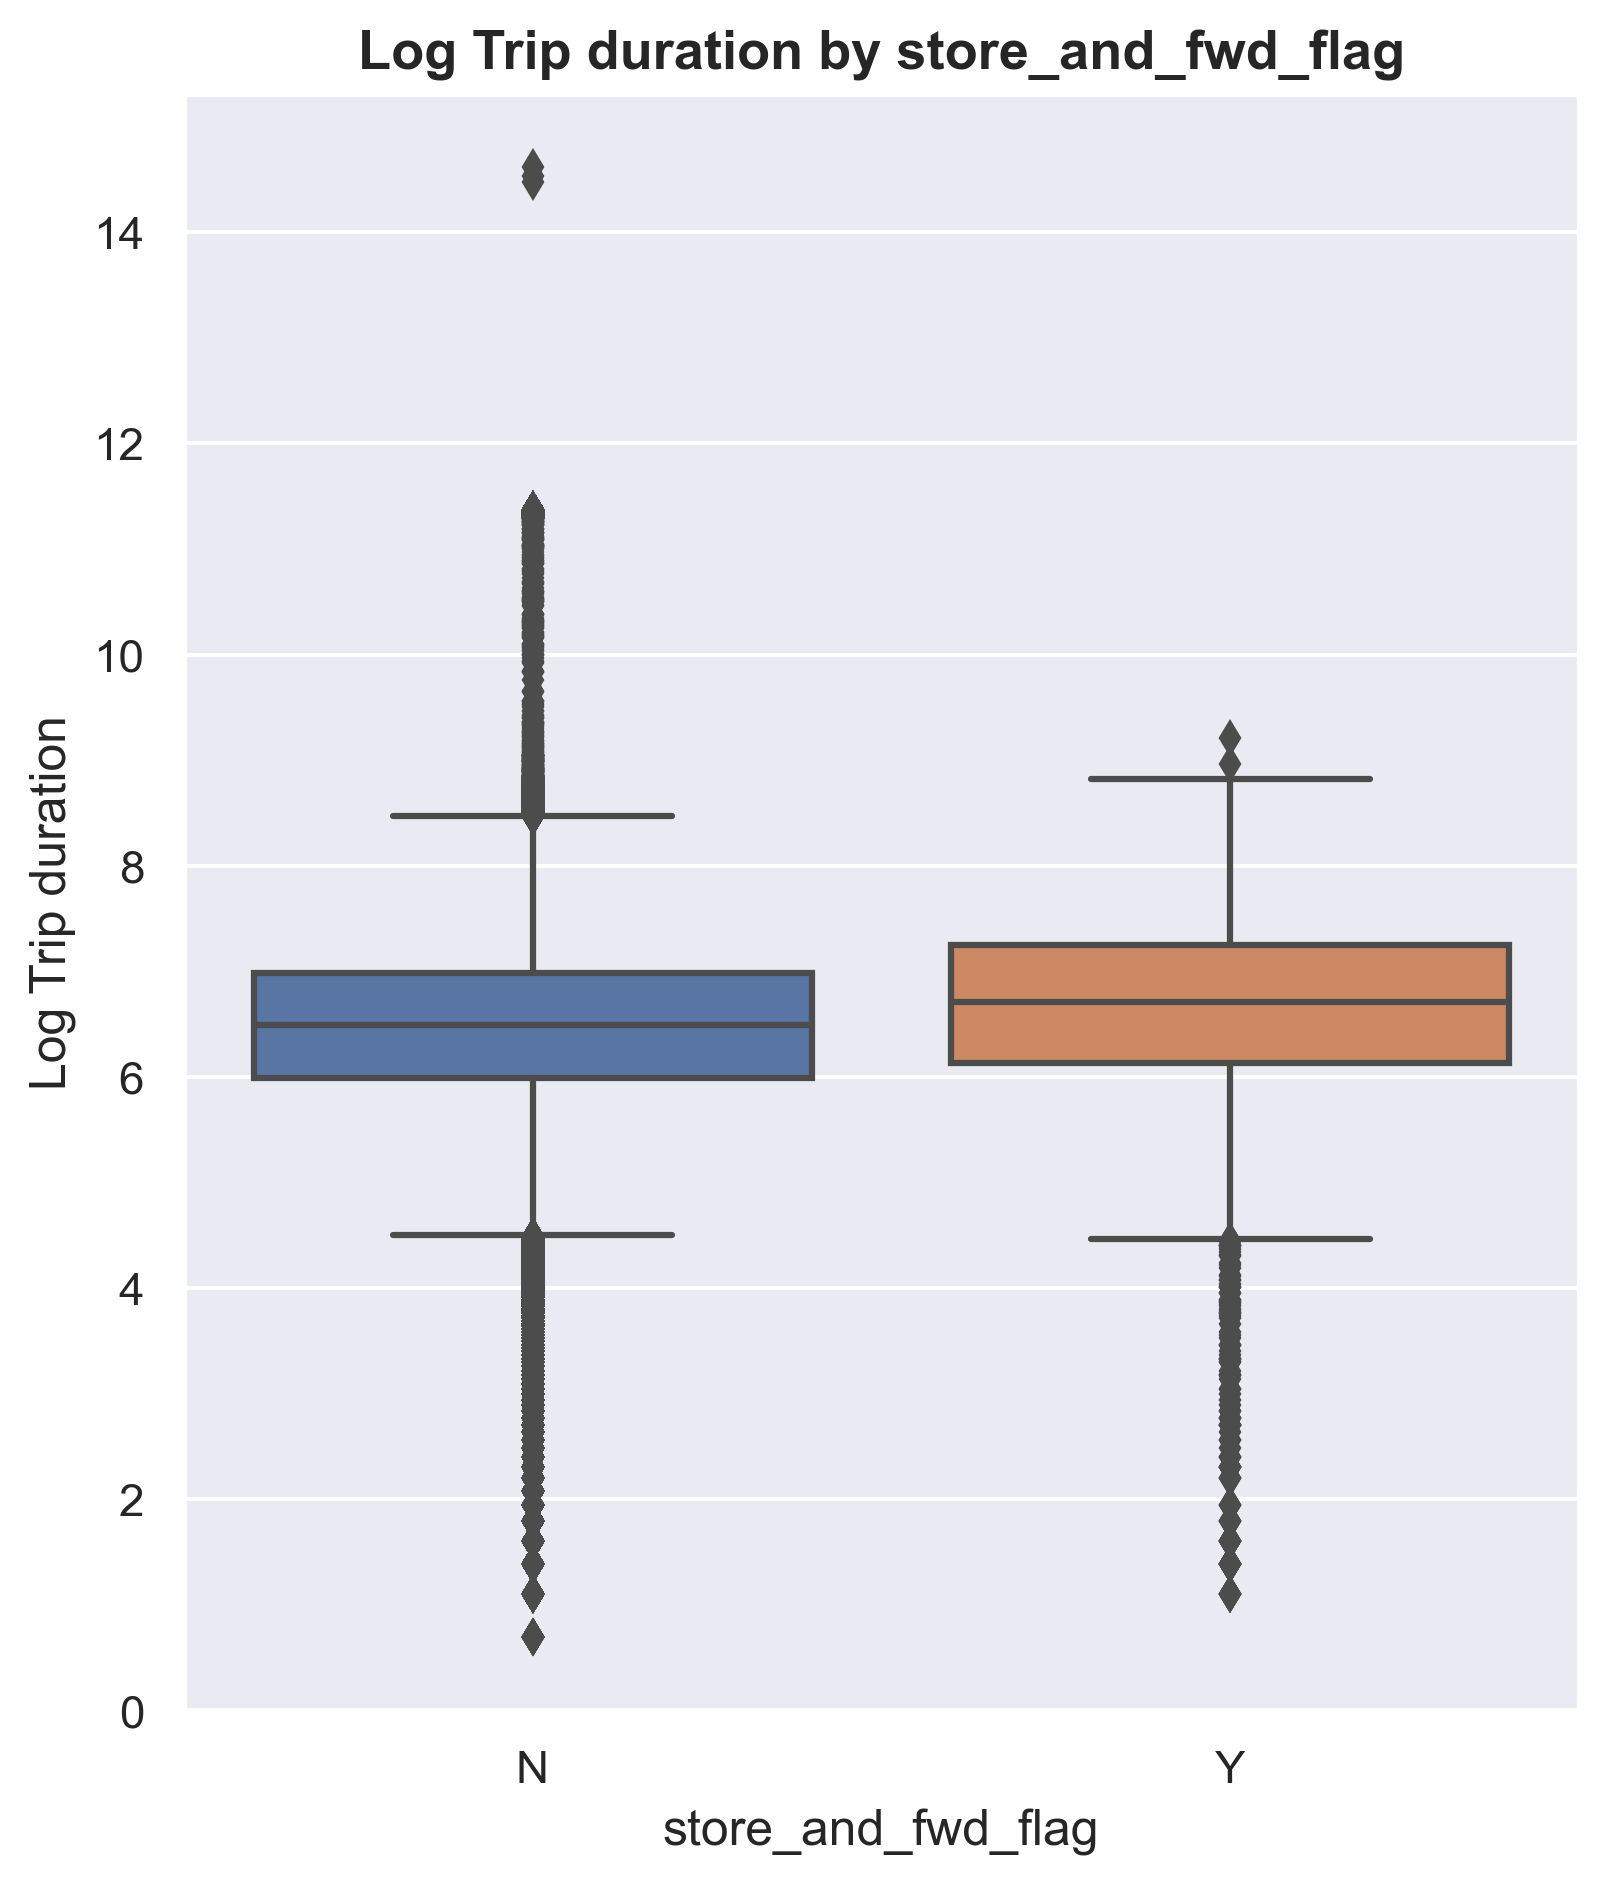

In [57]:
fig, ax = plt.subplots(figsize=(6, 7), dpi=300)

sns.boxplot(data=df_train, x='store_and_fwd_flag', y='log_trip_duration', ax=ax)

ax.set_xlabel('store_and_fwd_flag')
ax.set_ylabel('Log Trip duration')
ax.set_title('Log Trip duration by store_and_fwd_flag', size=13, weight='extra bold')

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [58]:
df_train['vendor_id'] = (df_train['vendor_id'] == 1).astype(int)
df_train['store_and_fwd_flag'] = (df_train['store_and_fwd_flag'] == 'Y').astype(int)

df_test['vendor_id'] = (df_test['vendor_id'] == 1).astype('int')
df_test['store_and_fwd_flag'] = (df_test['store_and_fwd_flag'] == 'Y').astype(int)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Немного полезным будет признак число пассажиров, другие два признака не очень хорошие так как распределения таргета почти одинаковые для двух разных групп значений признака**

In [59]:
df_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
430252   id2968130          0 2016-02-15 00:52:17                2   
598829   id2358444          0 2016-03-22 12:04:34                2   
314731   id0408430          0 2016-03-14 16:03:08                1   
1342009  id2305944          0 2016-01-14 12:02:41                1   
673814   id2198653          1 2016-06-26 23:10:20                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
430252         -73.934586        40.797016         -73.917397   
598829         -73.957748        40.764500         -73.978706   
314731         -73.982857        40.730961         -73.980171   
1342009        -73.982262        40.771389         -73.979973   
673814         -73.991264        40.749748         -73.976517   

         dropoff_latitude  store_and_fwd_flag  log_trip_duration  wday  month  \
430252          40.834545                   0           6.100319     0      2   
598829          40.758430                   0           7.047517     1      3   
314731          40.734741                   0           3.806662     0      3   
1342009         40.786072                   0           5.783825     3      1   
673814          40.749260                   0           6.084499     6      6   

         hour  snowfall  shooting  day  haversine  log_haversine  jam_time  \
430252      0         0         0   46   4.416633       1.689474         0   
598829     12         0         0   82   1.889749       1.061170         1   
314731     16         0         0   74   0.477393       0.390279         1   
1342009    12         0         0   14   1.643985       0.972287         1   
673814     23         0         0  178   1.243496       0.808035         0   

         free_time  
430252           0  
598829           0  
314731           0  
1342009          0  
673814           0

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [60]:
cat_cols = list(df_train.drop(columns=['id', 
                                       'vendor_id', 
                                       'store_and_fwd_flag', 
                                       'haversine', 
                                       'log_haversine', 
                                       'jam_time', 
                                       'free_time', 
                                       'snowfall', 
                                       'shooting',
                                  'pickup_datetime', 
                                  'log_trip_duration',
                                  'passenger_count', 
                                  'pickup_longitude', 
                                  'pickup_latitude', 
                                  'dropoff_longitude',
                                  'dropoff_latitude']).columns)

real_cols = ['passenger_count', 
             'pickup_longitude', 
             'pickup_latitude', 
             'dropoff_longitude',
             'dropoff_latitude', 
             'haversine', 
             'log_haversine']

ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist'), cat_cols), 
                       ('ss', StandardScaler(), real_cols)], remainder='passthrough')

In [61]:
X_train = ct.fit_transform(df_train.drop(columns=['log_trip_duration']))
y_train = df_train['log_trip_duration']

X_test = ct.transform(df_test.drop(columns=['log_trip_duration']))
y_test = df_test['log_trip_duration']

In [62]:
ct.get_feature_names_out() # смотрим какие признаки нам нужны

array(['ohe__wday_1', 'ohe__wday_2', 'ohe__wday_3', 'ohe__wday_4',
       'ohe__wday_5', 'ohe__wday_6', 'ohe__month_2', 'ohe__month_3',
       'ohe__month_4', 'ohe__month_5', 'ohe__month_6', 'ohe__hour_1',
       'ohe__hour_2', 'ohe__hour_3', 'ohe__hour_4', 'ohe__hour_5',
       'ohe__hour_6', 'ohe__hour_7', 'ohe__hour_8', 'ohe__hour_9',
       'ohe__hour_10', 'ohe__hour_11', 'ohe__hour_12', 'ohe__hour_13',
       'ohe__hour_14', 'ohe__hour_15', 'ohe__hour_16', 'ohe__hour_17',
       'ohe__hour_18', 'ohe__hour_19', 'ohe__hour_20', 'ohe__hour_21',
       'ohe__hour_22', 'ohe__hour_23', 'ohe__day_2', 'ohe__day_3',
       'ohe__day_4', 'ohe__day_5', 'ohe__day_6', 'ohe__day_7',
       'ohe__day_8', 'ohe__day_9', 'ohe__day_10', 'ohe__day_11',
       'ohe__day_12', 'ohe__day_13', 'ohe__day_14', 'ohe__day_15',
       'ohe__day_16', 'ohe__day_17', 'ohe__day_18', 'ohe__day_19',
       'ohe__day_20', 'ohe__day_21', 'ohe__day_22', 'ohe__day_23',
       'ohe__day_24', 'ohe__day_25', 'ohe__day_26',

In [63]:
X_train = np.column_stack((X_train[:, :215], X_train[:, 223], X_train[:, 225]))
X_test = np.column_stack((X_test[:, :215], X_test[:, 223], X_test[:, 225]))

In [64]:
from sklearn.linear_model import Ridge

est = Ridge()

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

In [65]:
print(f'RMSLE {rmsle(y_test, y_pred)}') # слабое улучшение как и предполагалось но я оставлю признаки

RMSLE 0.7853874576641471


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

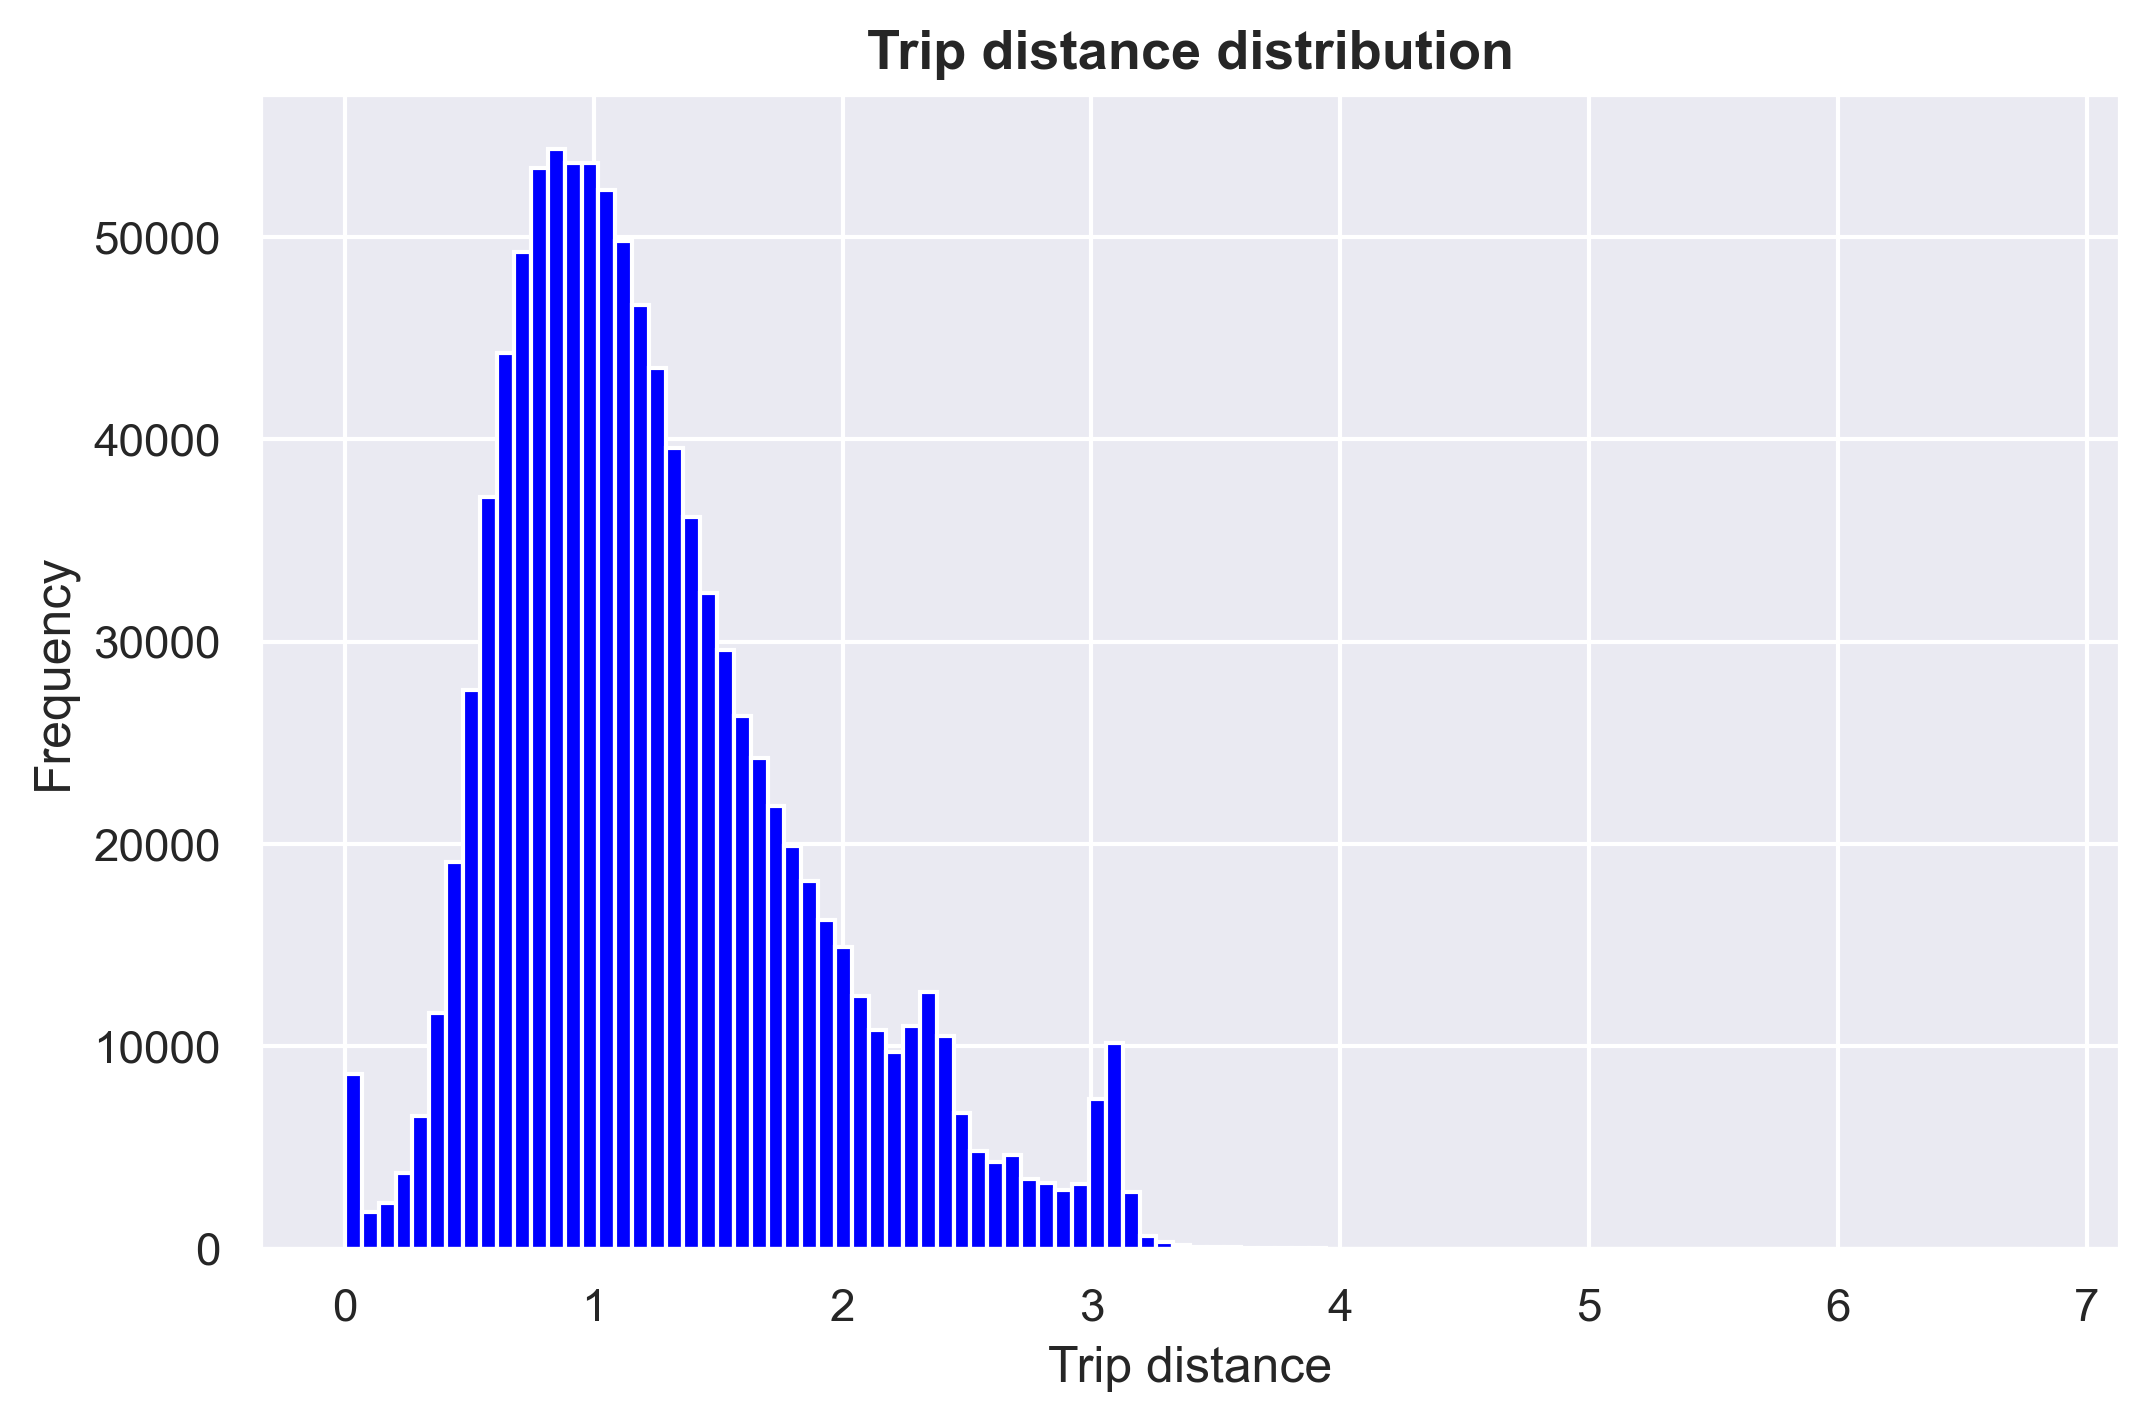

In [66]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(df_train['log_haversine'], color='blue', bins=100)

ax.set_xlabel('Trip distance')
ax.set_ylabel('Frequency')
ax.set_title('Trip distance distribution', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

In [67]:
df_train = df_train[(df_train['log_trip_duration'] > 3) & (df_train['log_trip_duration'] < 9)]

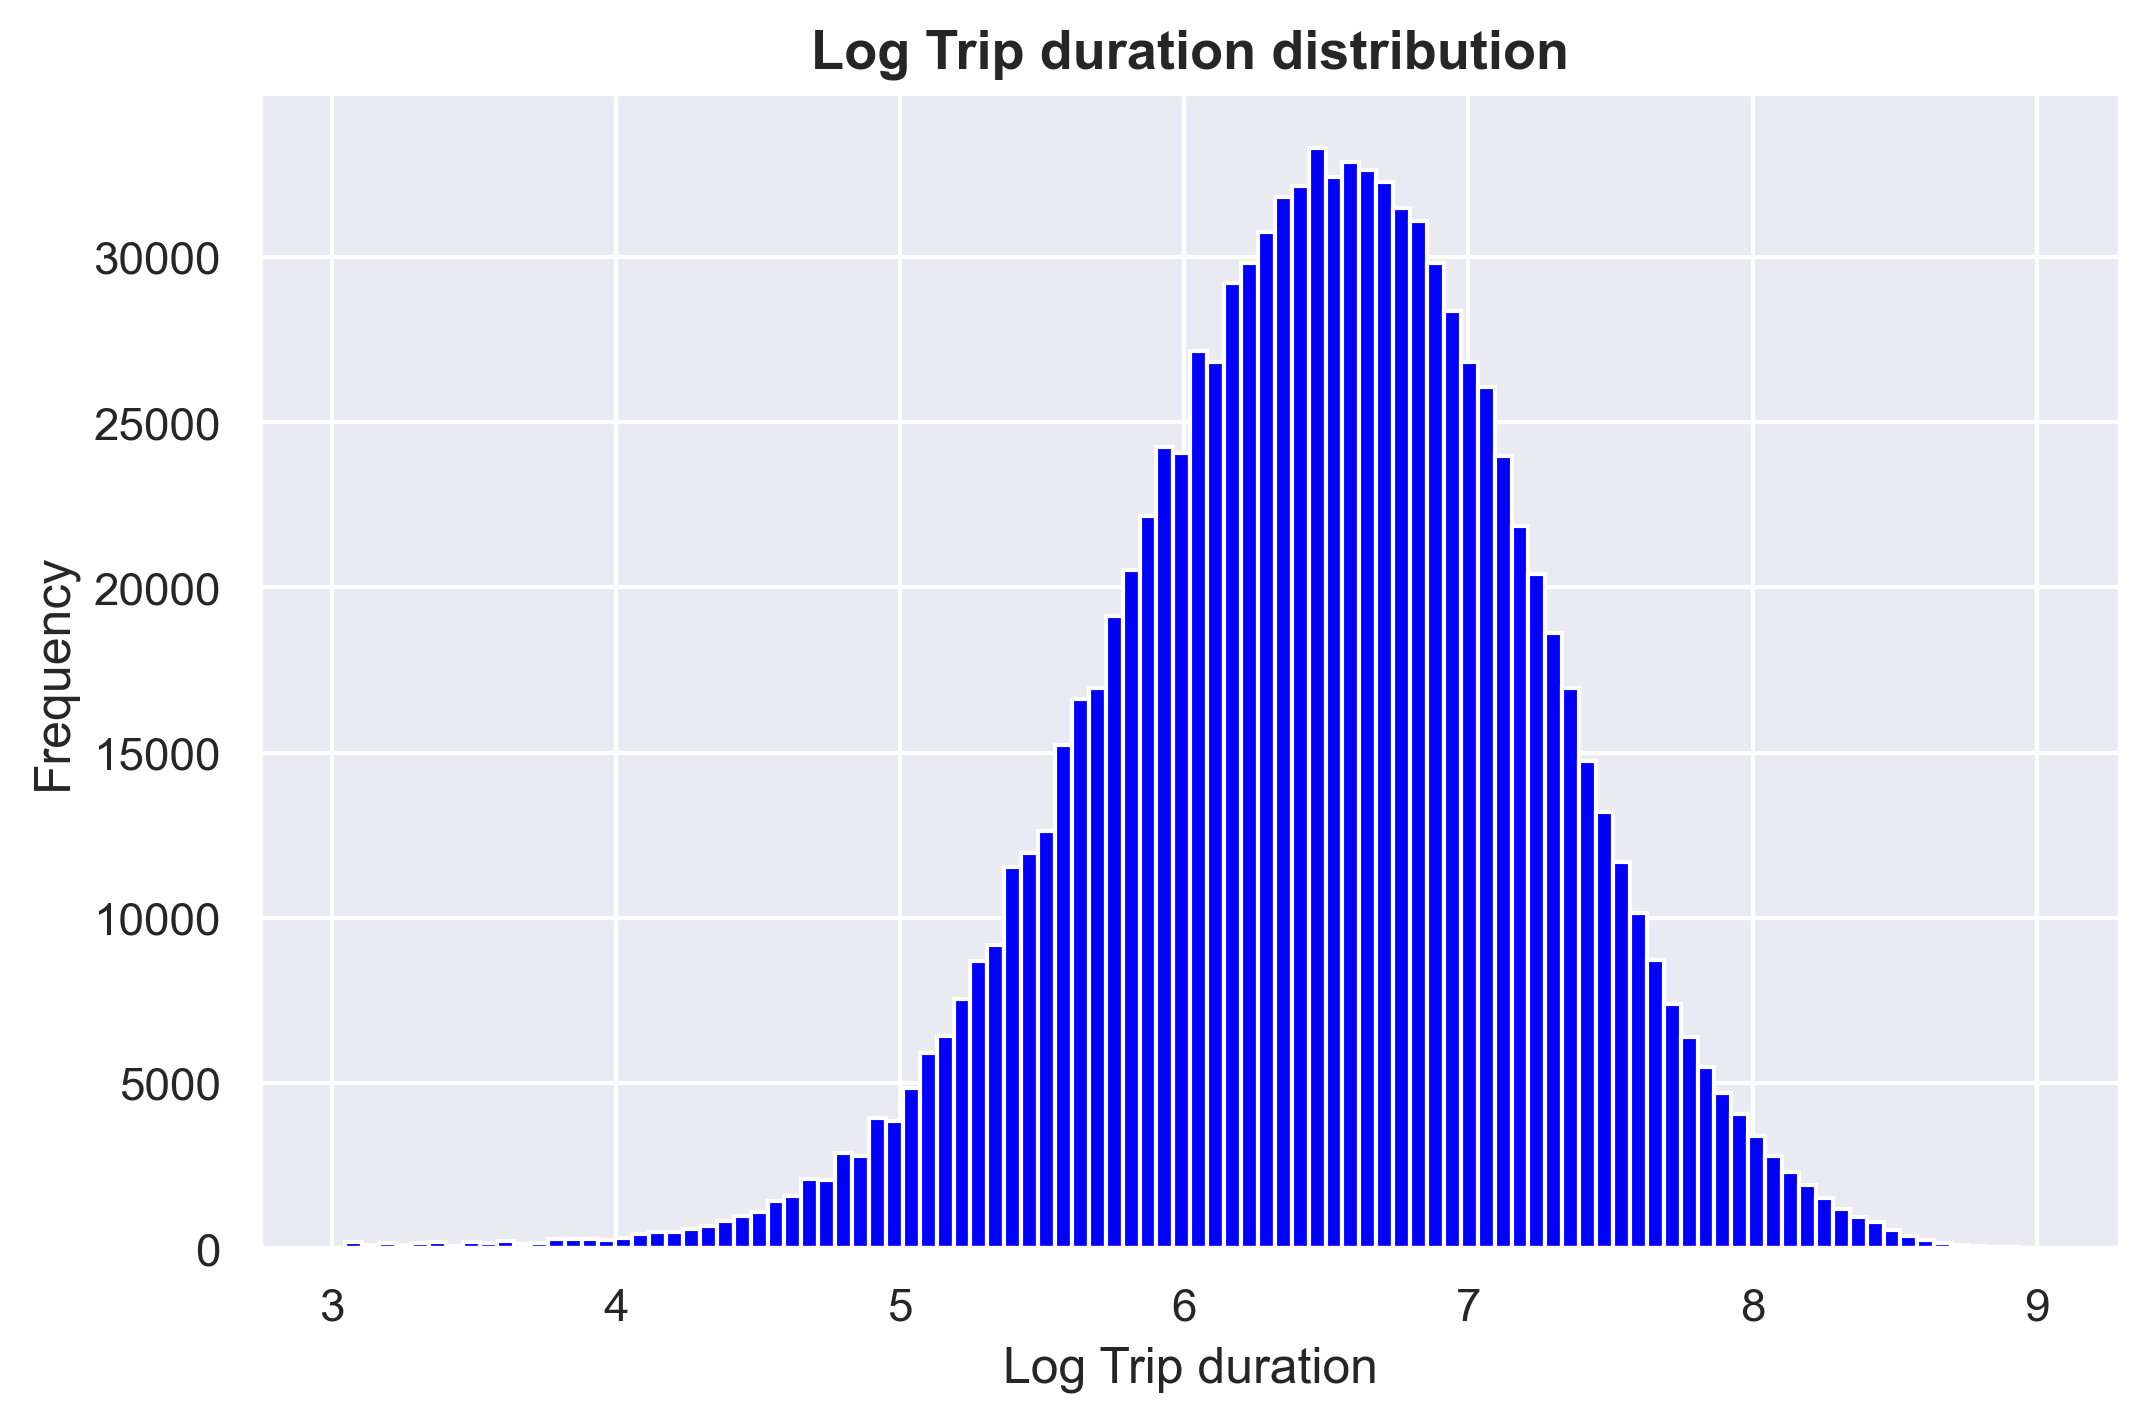

In [68]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(df_train['log_trip_duration'], color='blue', bins=100)

ax.set_xlabel('Log Trip duration')
ax.set_ylabel('Frequency')
ax.set_title('Log Trip duration distribution', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

In [69]:
df_train = df_train[df_train['log_haversine'] < 3.8]

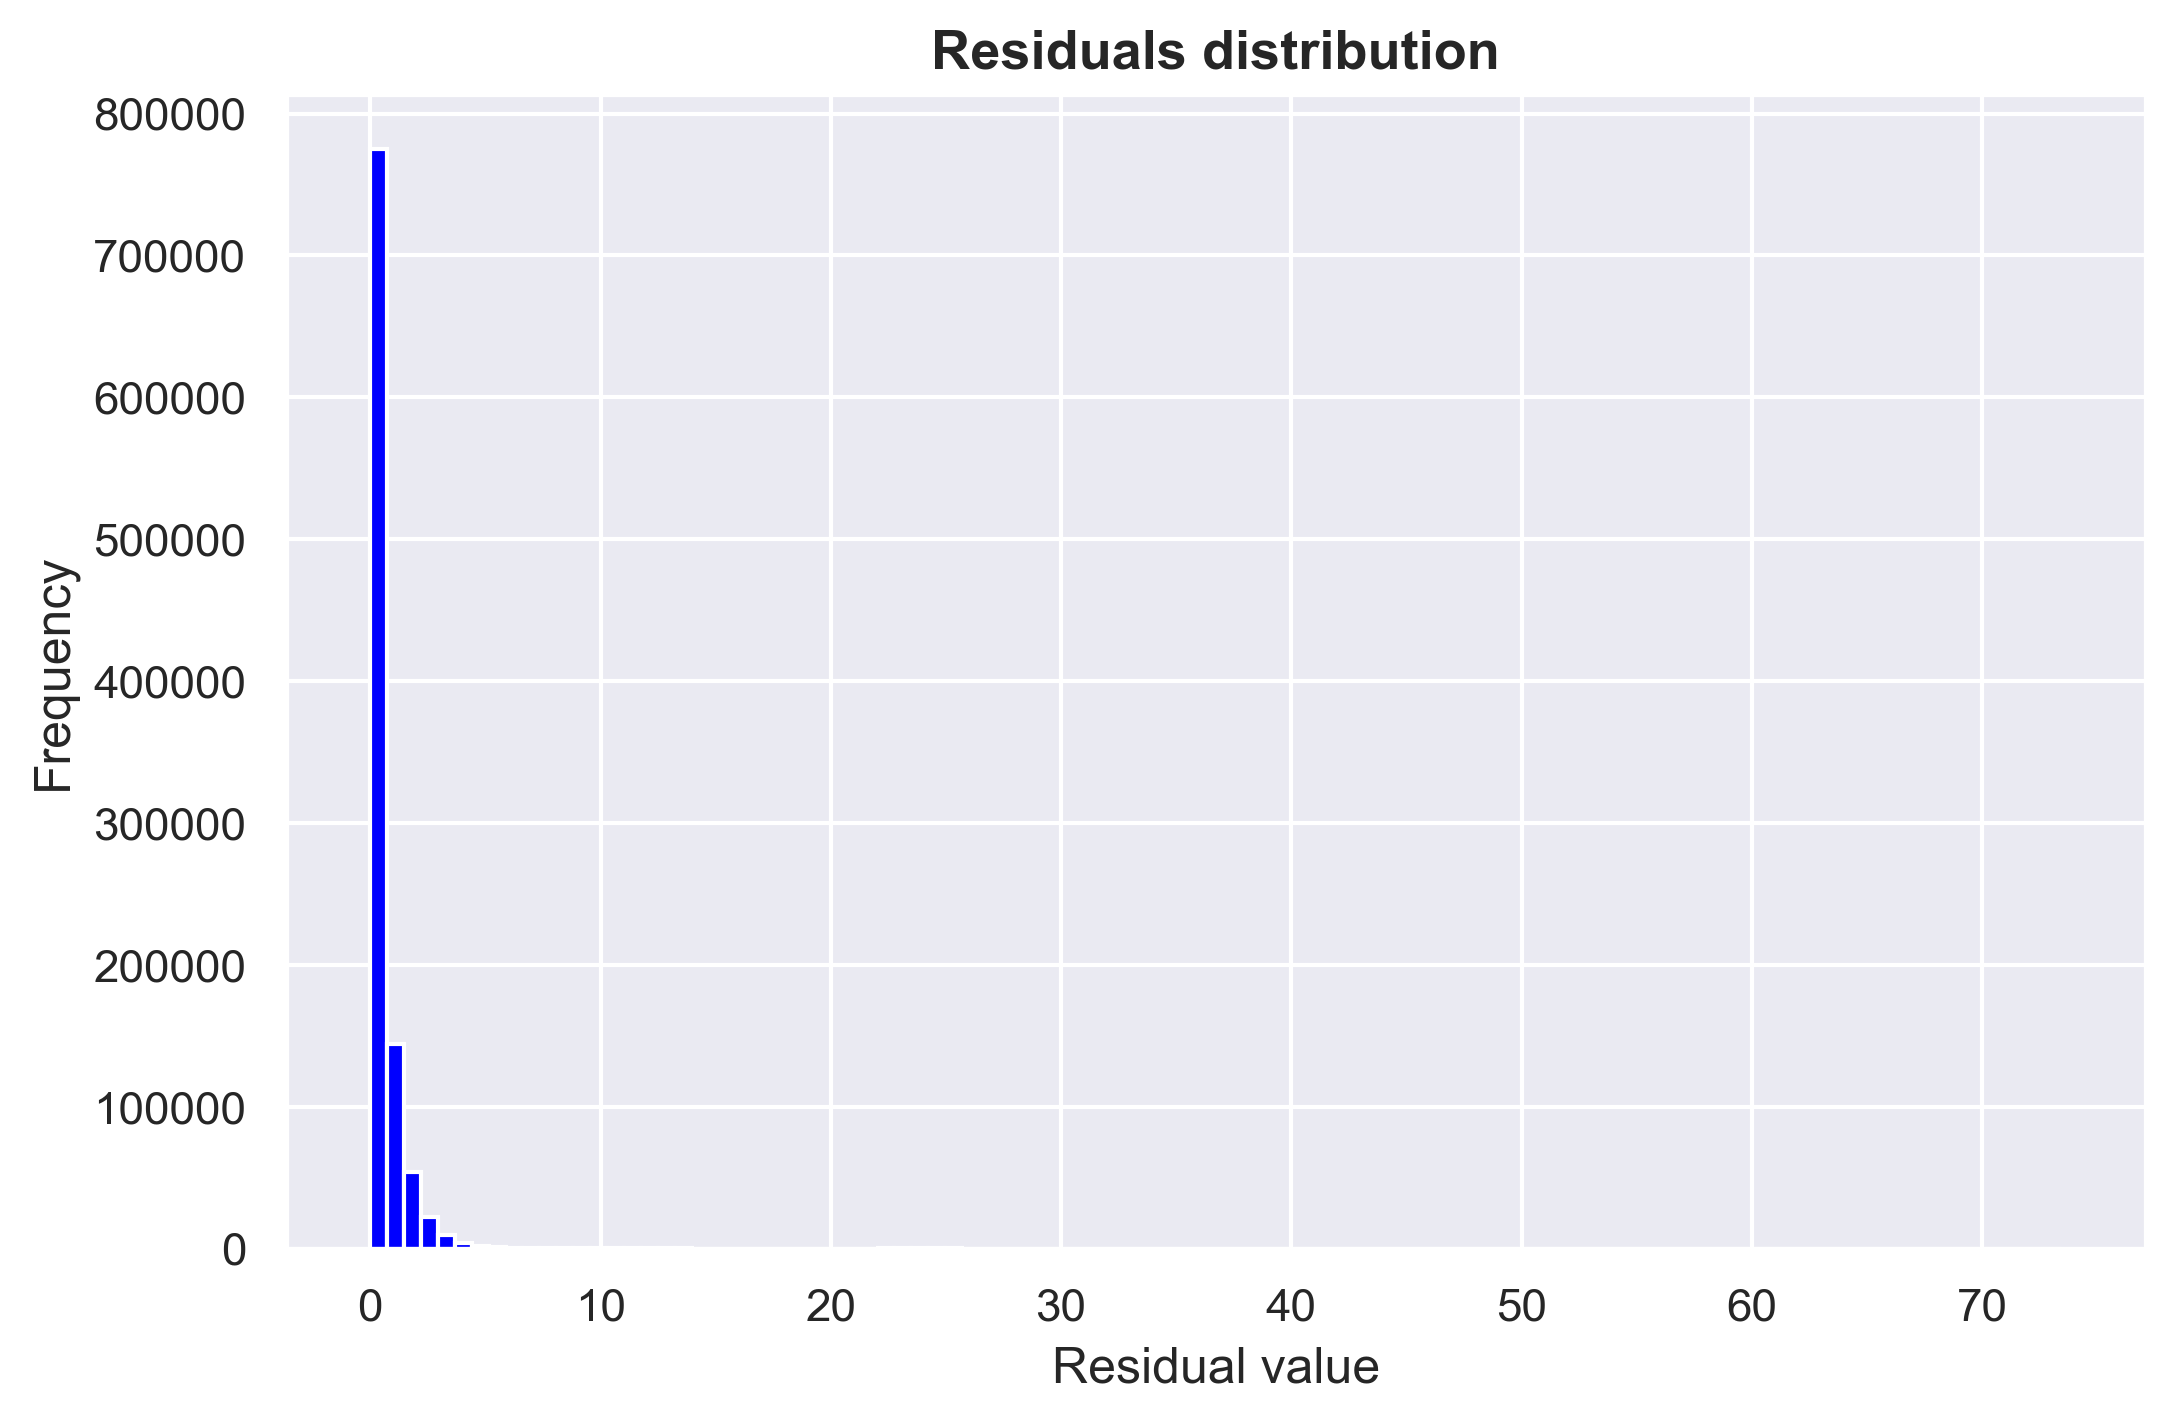

In [70]:
residuals = np.square(est.predict(X_train) - y_train)


fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.hist(residuals, color='blue', bins=100)

ax.set_xlabel('Residual value')
ax.set_ylabel('Frequency')
ax.set_title('Residuals distribution', size=13, weight='extra bold')
ax.set_ylim(0)

plt.show()

In [71]:
df_train = df_train[residuals < 6]

/var/folders/9f/vkkcjgls68b0pxjhdw4_rhwm0000gn/T/ipykernel_16638/1491871709.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = df_train[residuals < 6]


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

**Из категориальных признаков остаются только признаки связанные с датой (остальные бинарные и числовые их кодировать не нужно в случае с бинарным признаком - объединение в одну категорию всё равно что добавления константного признака)**

In [72]:
for col in ['wday', 'month', 'hour', 'day']:
    print(df_train[col].value_counts())

4    155361
5    153864
3    152013
2    145638
1    141044
6    135589
0    130310
Name: wday, dtype: int64
3    177869
4    175095
5    172759
2    165772
6    162767
1    159557
Name: month, dtype: int64
18    62948
19    62716
21    58965
20    58440
22    55966
17    52937
14    51617
15    50106
12    49741
13    49604
23    48501
11    47812
9     47107
8     46426
10    45564
16    44743
7     38815
0     37020
1     26678
6     23060
2     19355
3     14500
4     10969
5     10229
Name: hour, dtype: int64
100    6788
107    6736
65     6686
128    6485
44     6452
       ... 
2      4443
25     4203
151    3838
24     2375
23     1115
Name: day, Length: 182, dtype: int64


Объеденим 3, 4 и 5 часы в одну категорию

In [73]:
df_train['hour'] = df_train['hour'].apply(lambda hour: hour if hour not in {3, 4, 5} else 4)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [82]:
X_train = ct.fit_transform(df_train.drop(columns=['log_trip_duration', 'id', 'pickup_datetime']))
y_train = df_train['log_trip_duration']

X_test = ct.transform(df_test.drop(columns=['log_trip_duration', 'id', 'pickup_datetime']))
y_test = df_test['log_trip_duration']

/Users/alex/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [83]:
est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print(rmsle(y_pred, y_test)) # стало сильно лучше

0.4960378158954415


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [85]:
print(f'Before: {df.shape[1]}')
print(f'After: {len(ct.get_feature_names_out()) + 2}')

Before: 10
After: 228


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [86]:
from sklearn.linear_model import Lasso

est = Lasso()

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print(rmsle(y_pred, y_test)) # Ридж регрессия лучше

0.7935837348747788


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [91]:
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

params = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

best_lasso_metric = 10
best_ridge_metric = 10
best_lasso_param = params[0]
best_ridge_param = params[0]

for i in range(len(params)):
    lasso = Lasso(params[i])
    ridge = Ridge(params[i])
    
    lasso.fit(X_fit, y_fit)
    ridge.fit(X_fit, y_fit)
    
    lasso_pred = lasso.predict(X_val)
    ridge_pred = ridge.predict(X_val)
    
    lasso_metric = rmsle(lasso_pred, y_val)
    ridge_metric = rmsle(ridge_pred, y_val)
    
    if lasso_metric < best_lasso_metric:
        best_lasso_metric = lasso_metric
        best_lasso_param = params[i]
    if ridge_metric < best_ridge_metric:
        best_ridge_metric = ridge_metric
        best_ridge_param = params[i]
        
print(f'Best Lasso with param {best_lasso_param}: {best_lasso_metric}')
print(f'Best Ridge with param {best_ridge_param}: {best_ridge_metric}')

Best Lasso with param 0.0001: 0.4297649698581751
Best Ridge with param 0.0001: 0.42966049306066106


In [92]:
best_est = Ridge(0.0001)

best_est.fit(X_train, y_train)

y_pred = best_est.predict(X_test)

print(f'Best model on Test rmsle: {rmsle(y_pred, y_test)}') # хуже чем было до подбора гиперпараметров

Best model on Test rmsle: 0.4960385708593745


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [94]:
cnt_zero = []

for i in range(len(params)):
    lasso = Lasso(params[i])
    
    lasso.fit(X_fit, y_fit)
    
    cnt_zero_coefs = len(lasso.coef_) - np.count_nonzero(lasso.coef_)
    
    cnt_zero.append(cnt_zero_coefs)


[81, 190, 220, 225, 226, 226, 226, 226]


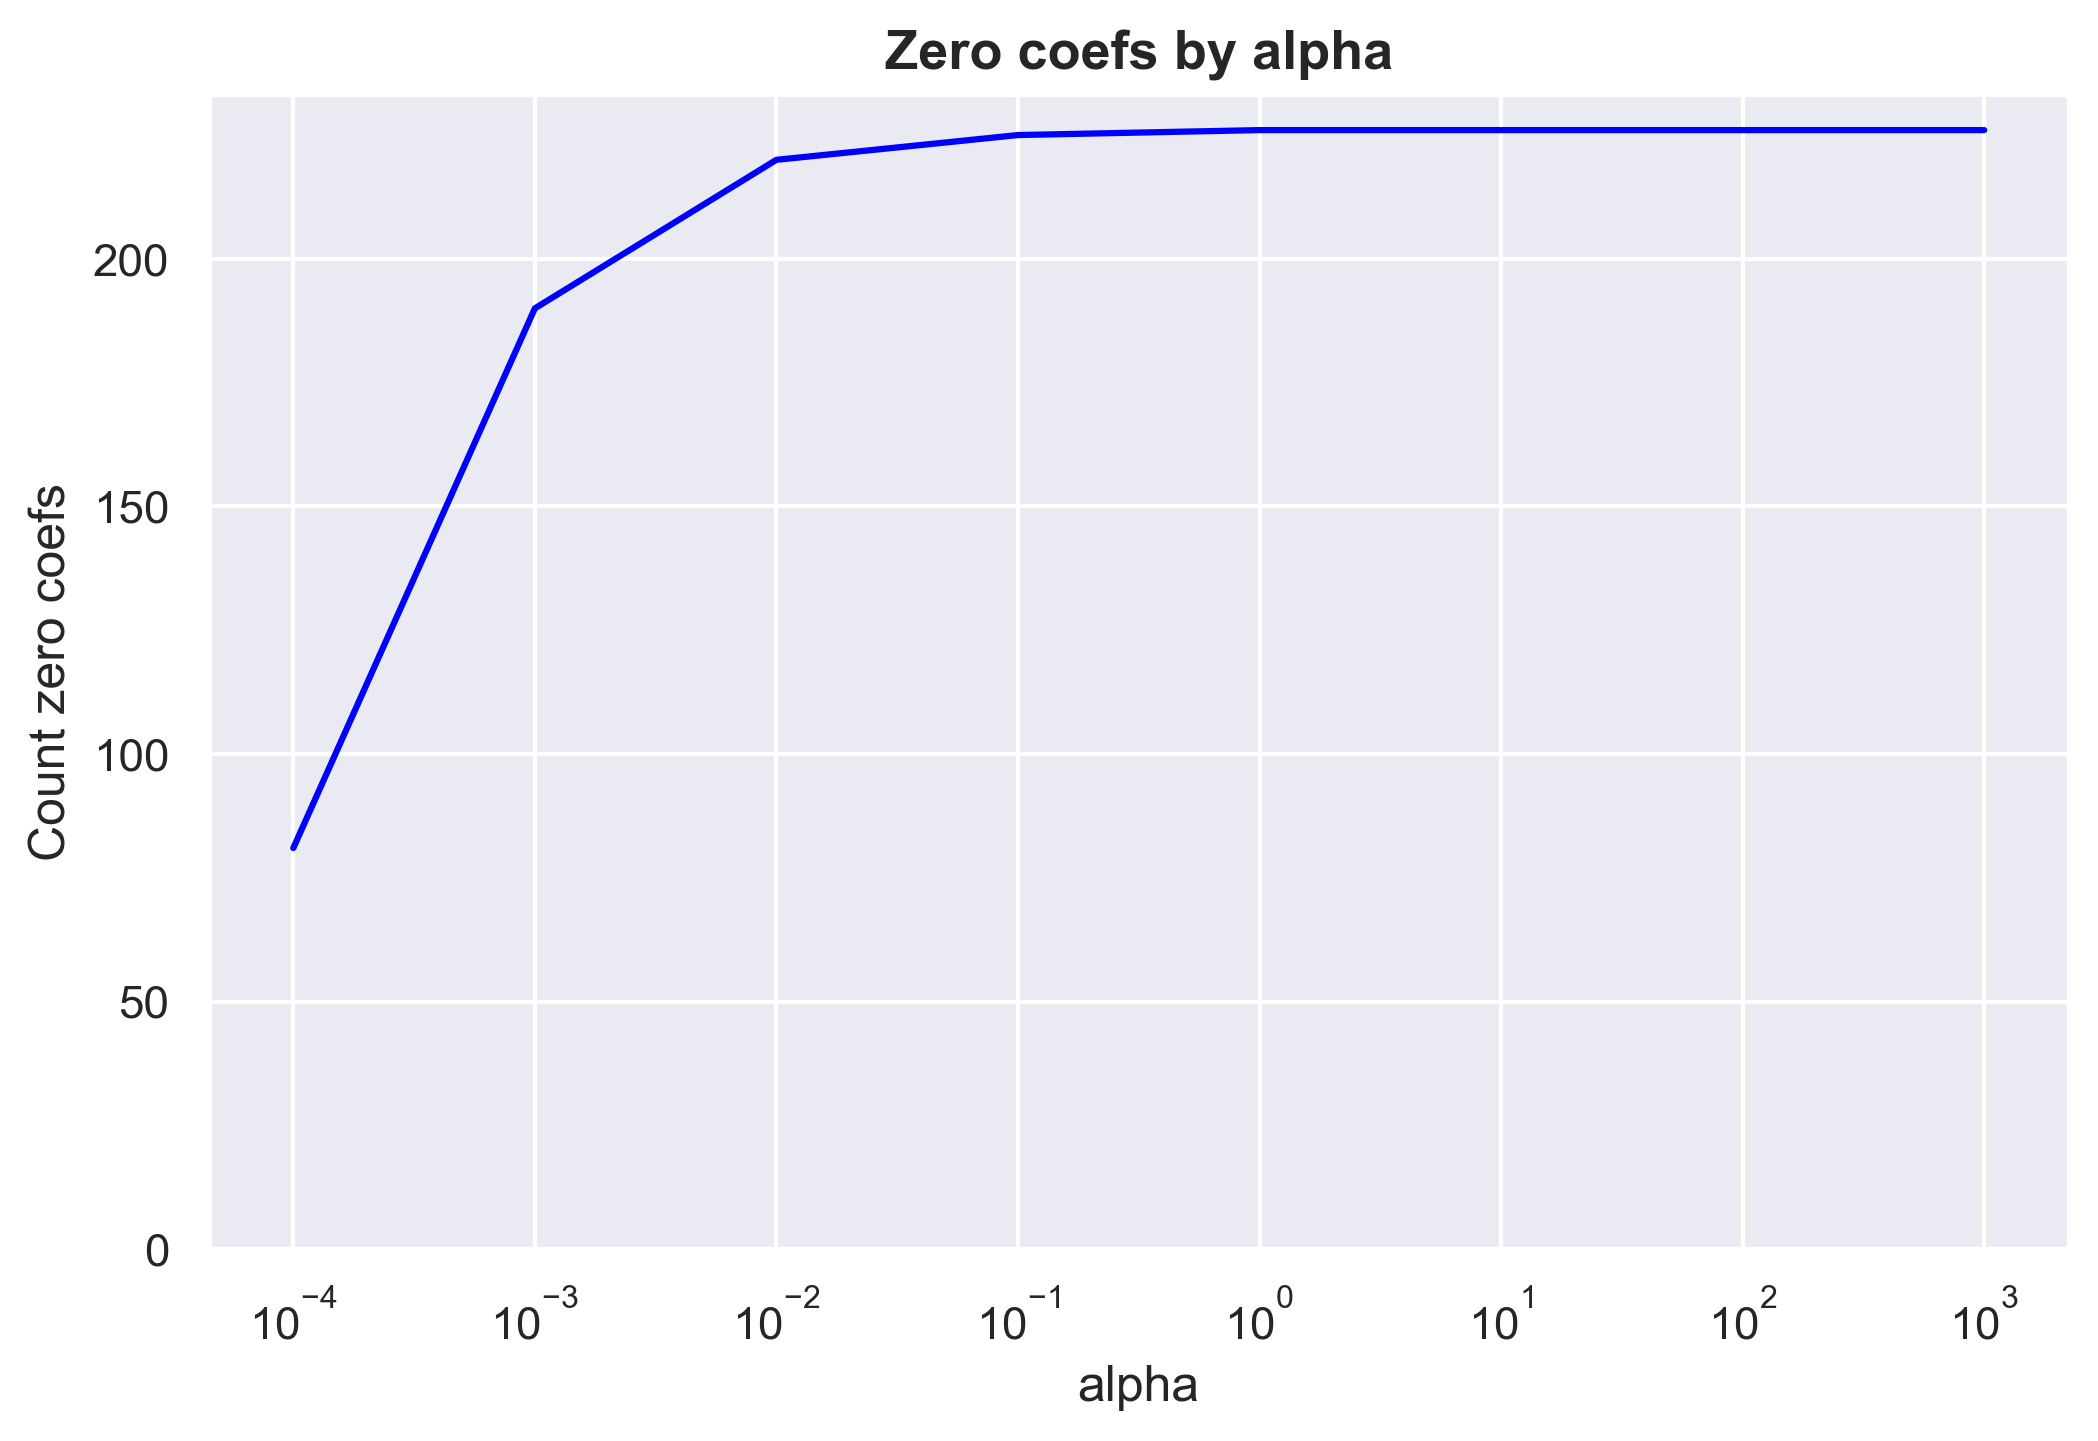

In [97]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

ax.plot(params, cnt_zero, color='blue')

ax.set_xlabel('alpha')
ax.set_ylabel('Count zero coefs')
ax.set_title('Zero coefs by alpha', size=13, weight='extra bold')
ax.set_xscale('log')
ax.set_ylim(0)

plt.show()

Чтобы избавиться от половины признаков нужно обучить модель с параметром примерно от 0.0001 до 0.001 переберем значения между этими числами

In [100]:
params = np.linspace(0.0001, 0.001, 20)

for i in range(len(params)):
    lasso = Lasso(params[i])
    
    lasso.fit(X_train, y_train)
    
    cnt_zero_coefs = len(lasso.coef_) - np.count_nonzero(lasso.coef_)
    
    if cnt_zero_coefs > 110:
        break
        
    y_pred = lasso.predict(X_test)
    
    metric = rmsle(y_pred, y_test)
    
    print(f'Count Zero coefs: {cnt_zero_coefs}')
    print(f'Test metric: {metric}')
    print()

Count Zero coefs: 83
Test metric: 0.4963212390124235



<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [63]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [64]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.